In [39]:
library('car')
library('stargazer')


Please cite as: 

 Hlavac, Marek (2018). stargazer: Well-Formatted Regression and Summary Statistics Tables.
 R package version 5.2.2. https://CRAN.R-project.org/package=stargazer 



In [8]:
# Loads crime_v2.csv
crime <- read.csv("crime_v2.csv", header=TRUE)

In [9]:
# Lists basic data on number of variables and observations, data types, and provides samples
str(crime)

'data.frame':	97 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : Factor w/ 92 levels "","`","0.068376102",..: 63 89 13 62 52 3 59 78 42 86 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  33

This dataset consists of 97 rows (entries) described by 25 variables (columns)

'county' looks to be specified by odd numbers

'prbconv' looks like it's messed up (factor type, not number like 'prbarr' and 'prbpris')
    - These data are spread across 92 levels. 92-96 are "", while 97 is "`"`

'west' and 'central' look to be binary variables. Do 0s indicate 'east' and something else?

In [10]:
(crime$prbconv)

[1] 0.527595997 1.481480002 0.267856985 0.525424004 0.476563007 0.068376102
 [7] 0.520606995 0.769231021 0.436441004 1.225610018 0.334701002 0.403780013
[13] 0.406780005 0.352941006 0.515464008 0.325300992 0.385495991 0.972972989
[19] 0.452829987 0.450567007 0.763333023 0.371879011 0.259833008 0.140350997
[25] 0.207830995 0.736908972 0.62251699  0.493438005 0.459215999 0.154451996
[31] 0.248275995 0.739394009 0.229589999 0.528302014 0.308411002 0.203724995
[37] 0.457210004 0.549019992 0.548494995 0.386925995 0.589905024 0.573943973
[43] 0.595077991 1.234380007 0.571429014 0.384236008 0.364353001 0.781608999
[49] 0.522387981 0.220339    1.5         0.793232977 0.347799987 0.226361006
[55] 0.438960999 1.358139992 0.393413007 0.495575011 0.271946996 0.477732986
[61] 1.068969965 0.28947401  0.412698001 0.314606994 0.340490997 0.426777989
[67] 1.015380025 0.36015299  0.520709991 0.559822977 0.443681002 0.492940009
[73] 0.50819701  0.401198    0.468531013 0.322580993 0.722972989 0.909090996
[79] 0.327868998 0.410596013 0.328664005 0.343023002 0.381908    2.121210098
[85] 0.443114012 0.300577998 0.449999988 0.588859022 0.588859022 1.670519948
[91] 1.182929993                                                            
[97] `          
92 Levels:  ` 0.068376102 0.140350997 0.154451996 0.203724995 ... 2.121210098

In [11]:
# Loads summary of crime object
summary(crime)

     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 52.0   1st Qu.:87   1st Qu.:0.020927   1st Qu.:0.20568  
 Median :105.0   Median :87   Median :0.029986   Median :0.27095  
 Mean   :101.6   Mean   :87   Mean   :0.033400   Mean   :0.29492  
 3rd Qu.:152.0   3rd Qu.:87   3rd Qu.:0.039642   3rd Qu.:0.34438  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
 NA's   :6       NA's   :6    NA's   :6          NA's   :6        
        prbconv      prbpris           avgsen           polpc         
            : 5   Min.   :0.1500   Min.   : 5.380   Min.   :0.000746  
 0.588859022: 2   1st Qu.:0.3648   1st Qu.: 7.340   1st Qu.:0.001231  
 `          : 1   Median :0.4234   Median : 9.100   Median :0.001485  
 0.068376102: 1   Mean   :0.4108   Mean   : 9.647   Mean   :0.001702  
 0.140350997: 1   3rd Qu.:0.4568   3rd Qu.:11.420   3rd Qu.:0.001877  
 0.154451996: 1   Max.   :0.6000   Max

There are 6 'NA' entries in all variables, except 'prbconv'; do these values all fall within the same rows? 

Yes, there are 6 rows (labelled 'NA' and 'NA.1'-'NA.5') with NA values across the board

In [12]:
crime[crime$year == "NA",]

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


This doesn't return anything; do I need to explicitly look for "" or "\`" 'prbconv' from above?

In [13]:
crime[crime$prvconv == "NA",]

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle


These appear to represent the same missing entries. However, the indicies are marked differently (92-97, instead of 'NA' and 'NA.1'-'NA.5' above).

In [14]:
crime[crime$prbconv == '' | crime$prbconv=='`',]

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
92,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
93,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
94,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
95,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
96,NA,NA,NA,NA,,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
97,NA,NA,NA,NA,`,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


- 'county' appears to be out of register somewhere, since the max = 197 and not 2(97) - 1 = 193, as I'd expect for 97 rows that are enumerated with odd numbers. [for n rows (1,2,...,k), county = 2n - 1] 

- Check on the number of counties in NC -> Katie says there are 100

- Only have a selection -> good that it doesn't exceed 100

- 'prbarr' is a probability and should not exceed 1, but the max is 1.09091

- Is this truly a probability? Could arrests exceed offenses?

- We need to convert 'prbconv' (after removing missing values) into numbers and not factors

- Ensure the range of probabilities make sense (see above)

- 'avgsen' seems really low, given that it's in days. Does this include people are are convicted, but don't receive a prison sentence (which would drive the average down). Is this effect enough to account for sentences imposed for severe crimes (e.g., murder, rape, assault, robbery)?

- Random thought: This dataset doesn't distinguish between severe crimes and comparatively minor ones
   - Does this represent an omitted variable?

- Is is realistic within a state the size of NC to have a county with a density of only
- 0.00002 (i.e., 1 person per 50,000 square miles)?
   - Does this represent wilderness area?
   - Are any other measures defined?

- Is it reasonable that the maximum density is only 8-9 people per square mile?
   - Average in all of NC is ~200 residents/square mile (208)

- As with other variables, unclear what the units of 'taxpc' are.
   - These values for 'taxpc' could be reasonable, but we don't know for certain

- How are 'west' and 'central' defined? In particular, should their be a 50:50 split for 'west'?

- 'urban' is heavily positively skewed, suggesting that most of NC is rural (unsurprising)

- 'pctmin80' looks reasonable

- Wage information looks to be within reasonable ranges

- What does 'mix' indicate? 

Next steps
- Eliminate "NA" values

- I still need to look at histograms of these variables to check the distributions

- Should also generate scatterplot matrix

- Consider models of 'crmrte' against following regressors:
   - prbarr, prbconv, prbpris, (avgsen?)
   - density, pctmin80, pctymle
   - density, polpc, taxpc

In [15]:
# Eliminates rows with missing values
clean <- crime[complete.cases(crime),]

In [16]:
# Checks that blank rows aren't present
clean[clean$prbconv == '' | clean$prbconv=='`',]
clean[clean$year == "NA",]
tail(clean)

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle


Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle


,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
86,189,87,0.0313130,0.161381,0.300577998,0.288462,12.27,0.00227837,1.1019108,31.33022,⋯,354.2510,180.9359,369.4332,253.2281,304.72,427.84,451.79,297.19,0.05719921,0.15092644
87,191,87,0.0458895,0.172257,0.449999988,0.421053,9.59,0.00122733,1.7725632,32.74533,⋯,400.8570,230.9888,320.0345,238.4958,295.26,334.55,375.45,327.62,0.08616445,0.08828809
88,193,87,0.0235277,0.266055,0.588859022,0.423423,5.86,0.00117887,0.8138298,28.51783,⋯,480.1948,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.11050157,0.07819394
89,193,87,0.0235277,0.266055,0.588859022,0.423423,5.86,0.00117887,0.8138298,28.51783,⋯,480.1948,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.11050157,0.07819394
90,195,87,0.0313973,0.201397,1.670519948,0.470588,13.02,0.00445923,1.7459893,53.66693,⋯,377.9356,246.0614,411.4330,296.8684,392.27,480.79,303.11,337.28,0.15612382,0.07945071
91,197,87,0.0141928,0.207595,1.182929993,0.360825,12.23,0.00118573,0.8898810,25.95258,⋯,341.8803,182.8020,348.1432,212.8205,322.92,391.72,385.65,306.85,0.06756757,0.07419893


In [17]:
# Checks for duplicate rows
clean[duplicated(clean),]

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
89,193,87,0.0235277,0.266055,0.588859022,0.423423,5.86,0.00117887,0.8138298,28.51783,⋯,480.1948,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.1105016,0.07819394


In [18]:
# Verifies which row is a duplicate
clean[clean$county == 193,]

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
88,193,87,0.0235277,0.266055,0.588859022,0.423423,5.86,0.00117887,0.8138298,28.51783,⋯,480.1948,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.1105016,0.07819394
89,193,87,0.0235277,0.266055,0.588859022,0.423423,5.86,0.00117887,0.8138298,28.51783,⋯,480.1948,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.1105016,0.07819394


In [19]:
# Eliminates duplicate rows
clean <- clean[!duplicated(clean),]

In [37]:
# Checks for duplicate rows
# clean[duplicated(clean),]
duplicated(clean)
length(duplicated(clean))
dim(clean)

clean[duplicated(clean),]

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[37] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[49] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[61] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[73] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[85] FALSE FALSE FALSE FALSE FALSE FALSE

[1] 90

[1] 90 25

Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”Warning message in cbind(parts$left, ellip_h, parts$right, deparse.level = 0L):
“number of rows of result is not a multiple of vector length (arg 2)”

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle


In [21]:
# Verifies which row is a duplicate
clean[clean$county == 193,]

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
88,193,87,0.0235277,0.266055,0.588859022,0.423423,5.86,0.00117887,0.8138298,28.51783,⋯,480.1948,268.3836,365.0196,295.9352,295.63,468.26,337.88,348.74,0.1105016,0.07819394


In [22]:
# Re-cast 'prbconv' from factors into numbers
clean$prbconv <- as.numeric(as.character(clean$prbconv))

In [23]:
summary(clean)
str(clean)

     county           year        crmrte             prbarr       
 Min.   :  1.0   Min.   :87   Min.   :0.005533   Min.   :0.09277  
 1st Qu.: 51.5   1st Qu.:87   1st Qu.:0.020604   1st Qu.:0.20495  
 Median :103.0   Median :87   Median :0.030002   Median :0.27146  
 Mean   :100.6   Mean   :87   Mean   :0.033510   Mean   :0.29524  
 3rd Qu.:150.5   3rd Qu.:87   3rd Qu.:0.040249   3rd Qu.:0.34487  
 Max.   :197.0   Max.   :87   Max.   :0.098966   Max.   :1.09091  
    prbconv           prbpris           avgsen           polpc          
 Min.   :0.06838   Min.   :0.1500   Min.   : 5.380   Min.   :0.0007459  
 1st Qu.:0.34422   1st Qu.:0.3642   1st Qu.: 7.375   1st Qu.:0.0012378  
 Median :0.45170   Median :0.4222   Median : 9.110   Median :0.0014897  
 Mean   :0.55086   Mean   :0.4106   Mean   : 9.689   Mean   :0.0017080  
 3rd Qu.:0.58513   3rd Qu.:0.4576   3rd Qu.:11.465   3rd Qu.:0.0018856  
 Max.   :2.12121   Max.   :0.6000   Max.   :20.700   Max.   :0.0090543  
    density         

'data.frame':	90 obs. of  25 variables:
 $ county  : int  1 3 5 7 9 11 13 15 17 19 ...
 $ year    : int  87 87 87 87 87 87 87 87 87 87 ...
 $ crmrte  : num  0.0356 0.0153 0.013 0.0268 0.0106 ...
 $ prbarr  : num  0.298 0.132 0.444 0.365 0.518 ...
 $ prbconv : num  0.528 1.481 0.268 0.525 0.477 ...
 $ prbpris : num  0.436 0.45 0.6 0.435 0.443 ...
 $ avgsen  : num  6.71 6.35 6.76 7.14 8.22 ...
 $ polpc   : num  0.001828 0.000746 0.001234 0.00153 0.00086 ...
 $ density : num  2.423 1.046 0.413 0.492 0.547 ...
 $ taxpc   : num  31 26.9 34.8 42.9 28.1 ...
 $ west    : int  0 0 1 0 1 1 0 0 0 0 ...
 $ central : int  1 1 0 1 0 0 0 0 0 0 ...
 $ urban   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ pctmin80: num  20.22 7.92 3.16 47.92 1.8 ...
 $ wcon    : num  281 255 227 375 292 ...
 $ wtuc    : num  409 376 372 398 377 ...
 $ wtrd    : num  221 196 229 191 207 ...
 $ wfir    : num  453 259 306 281 289 ...
 $ wser    : num  274 192 210 257 215 ...
 $ wmfg    : num  335 300 238 282 291 ...
 $ wfed    : num 

In [24]:
# 'prbconv' seems high (2>1), but could represent a similar issue with 
# the time lag we see for 'prbarr'
clean$prbconv

[1] 0.5275960 1.4814800 0.2678570 0.5254240 0.4765630 0.0683761 0.5206070
 [8] 0.7692310 0.4364410 1.2256100 0.3347010 0.4037800 0.4067800 0.3529410
[15] 0.5154640 0.3253010 0.3854960 0.9729730 0.4528300 0.4505670 0.7633330
[22] 0.3718790 0.2598330 0.1403510 0.2078310 0.7369090 0.6225170 0.4934380
[29] 0.4592160 0.1544520 0.2482760 0.7393940 0.2295900 0.5283020 0.3084110
[36] 0.2037250 0.4572100 0.5490200 0.5484950 0.3869260 0.5899050 0.5739440
[43] 0.5950780 1.2343800 0.5714290 0.3842360 0.3643530 0.7816090 0.5223880
[50] 0.2203390 1.5000000 0.7932330 0.3478000 0.2263610 0.4389610 1.3581400
[57] 0.3934130 0.4955750 0.2719470 0.4777330 1.0689700 0.2894740 0.4126980
[64] 0.3146070 0.3404910 0.4267780 1.0153800 0.3601530 0.5207100 0.5598230
[71] 0.4436810 0.4929400 0.5081970 0.4011980 0.4685310 0.3225810 0.7229730
[78] 0.9090910 0.3278690 0.4105960 0.3286640 0.3430230 0.3819080 2.1212101
[85] 0.4431140 0.3005780 0.4500000 0.5888590 1.6705199 1.1829300

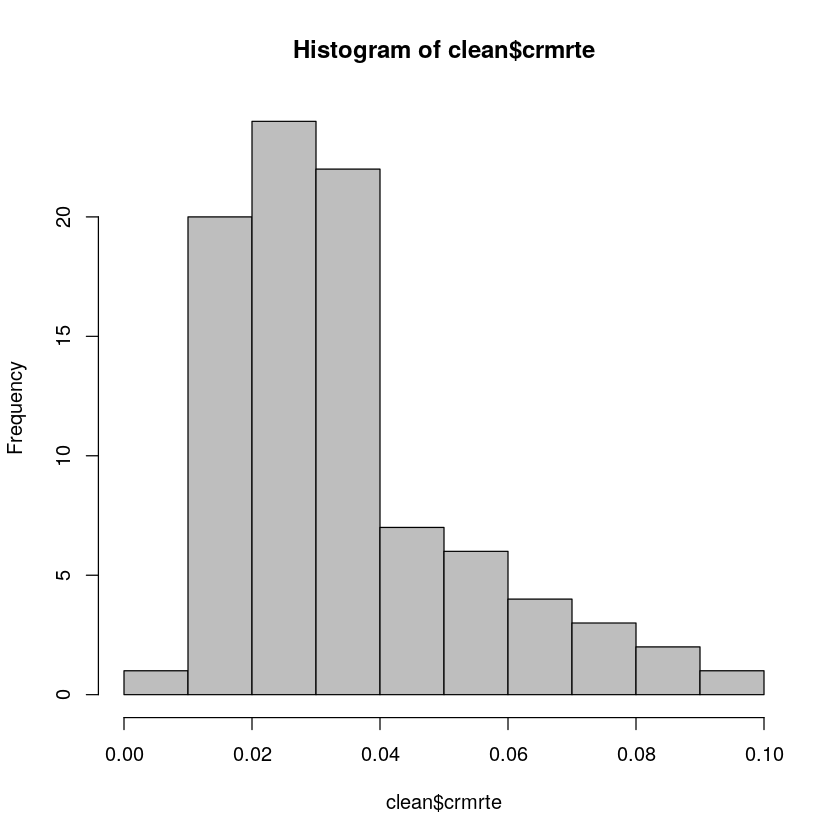

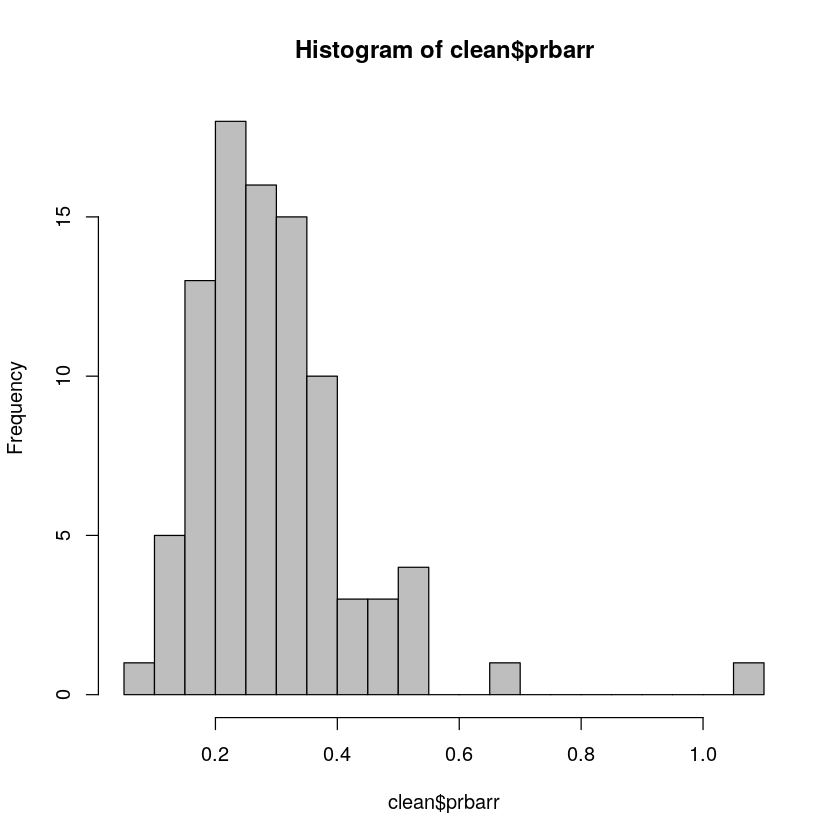

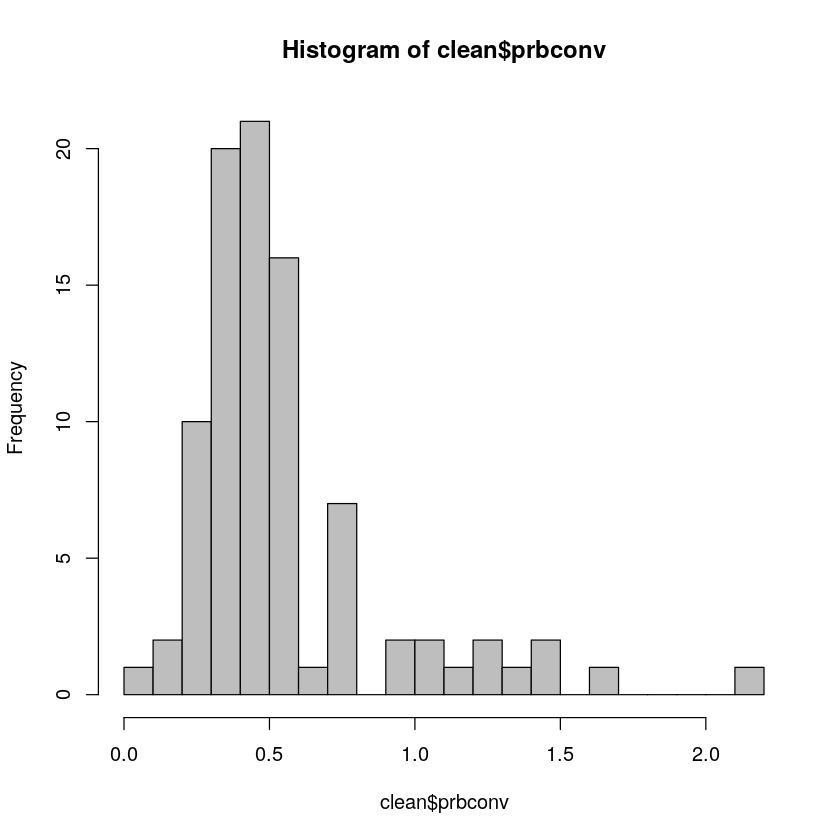

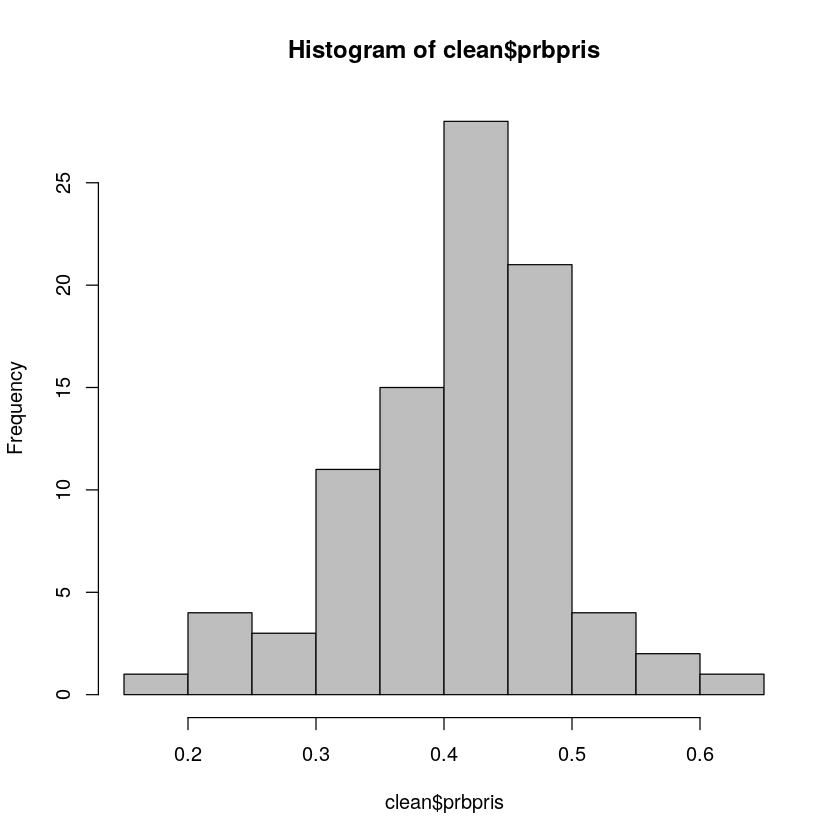

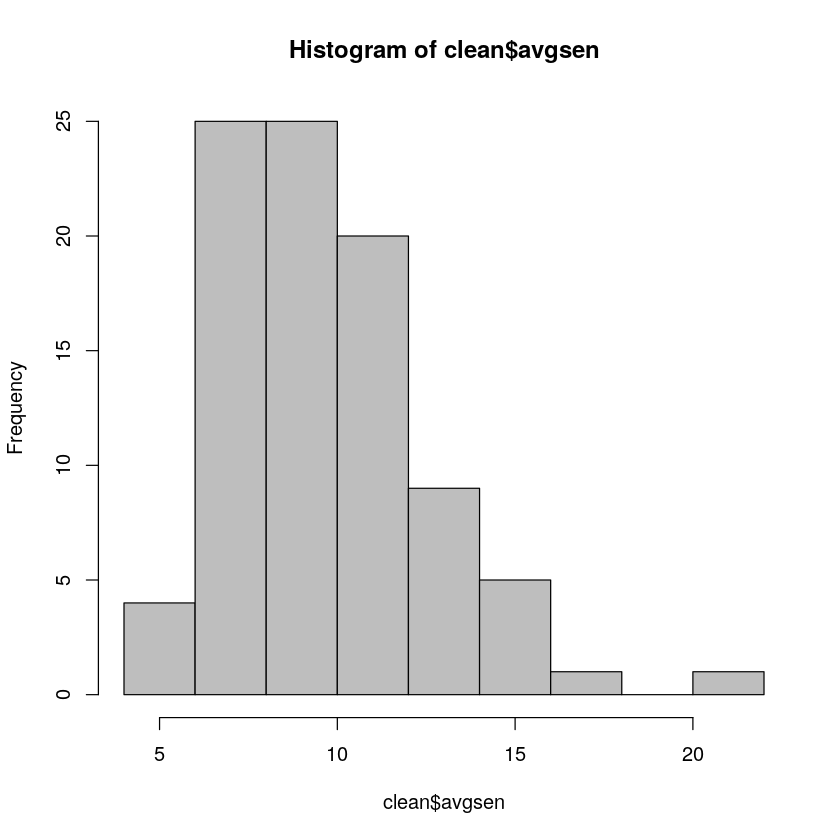

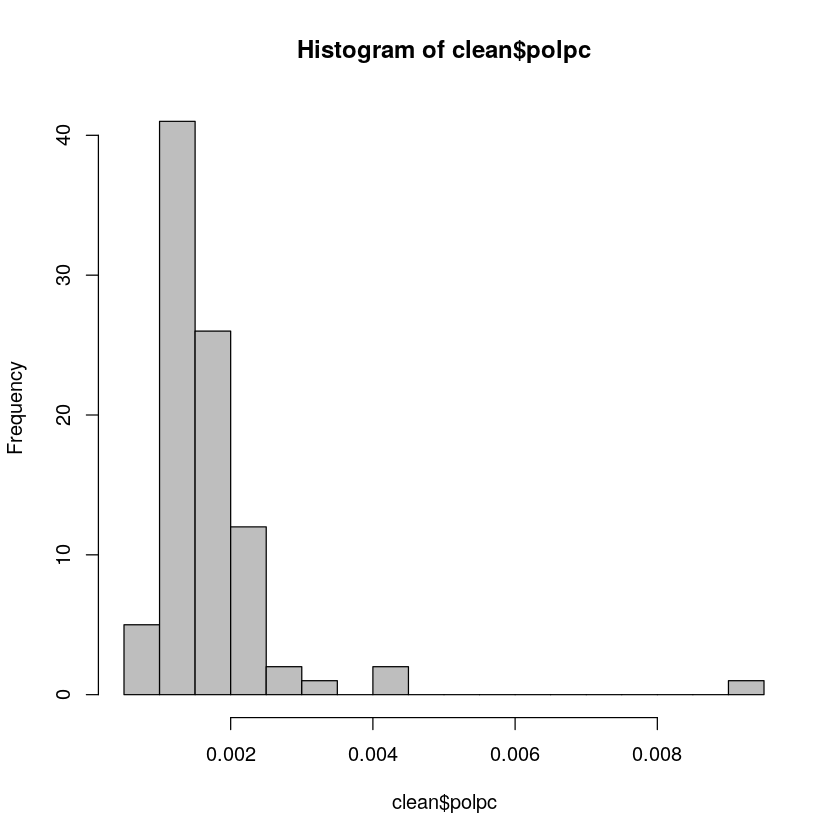

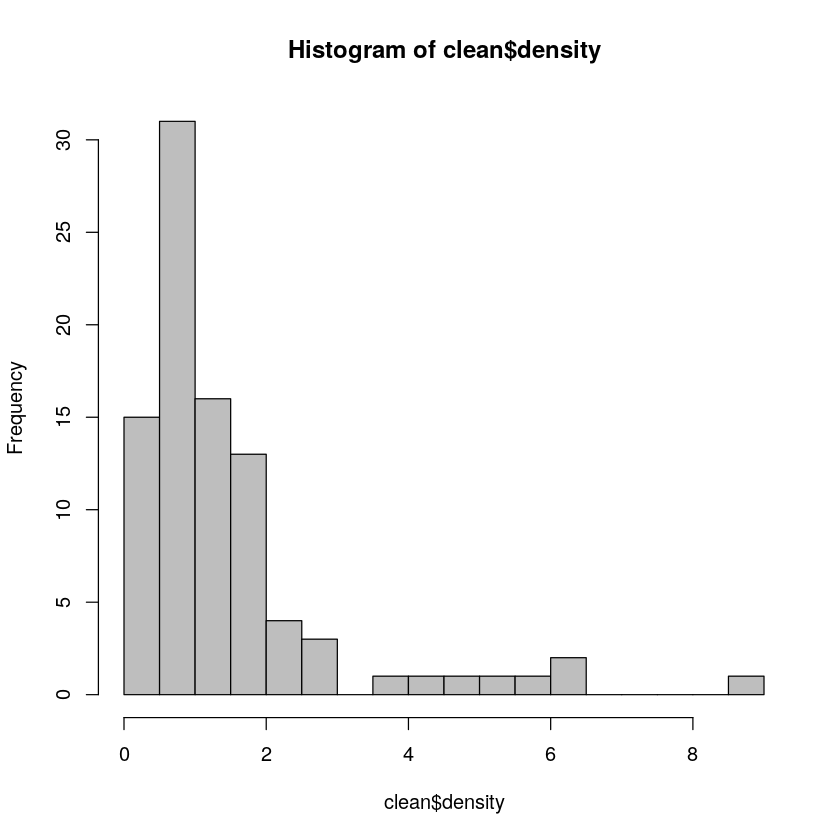

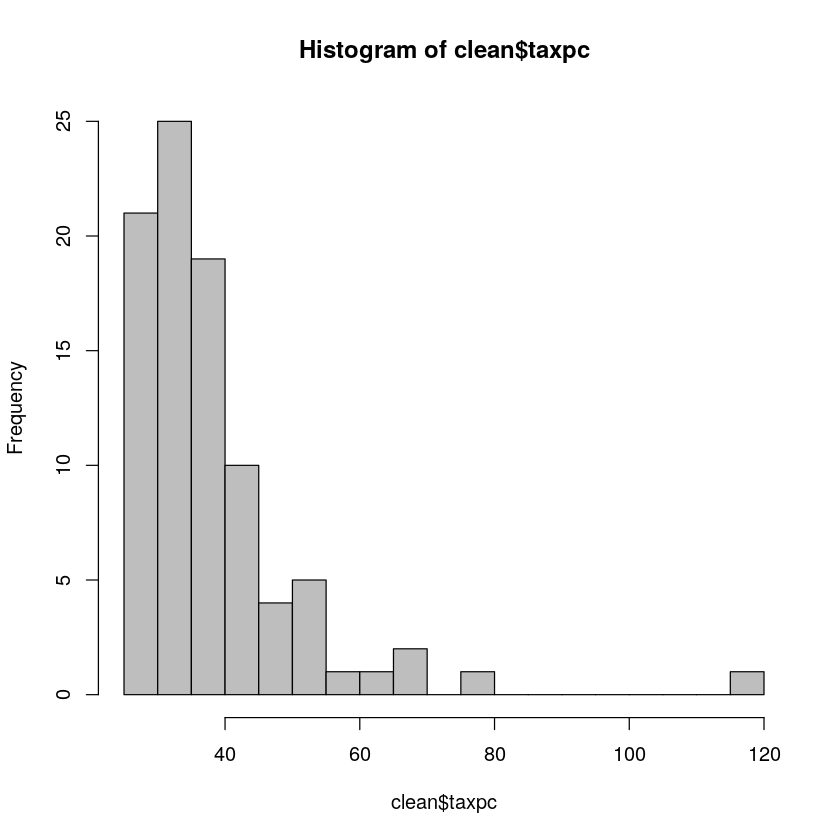

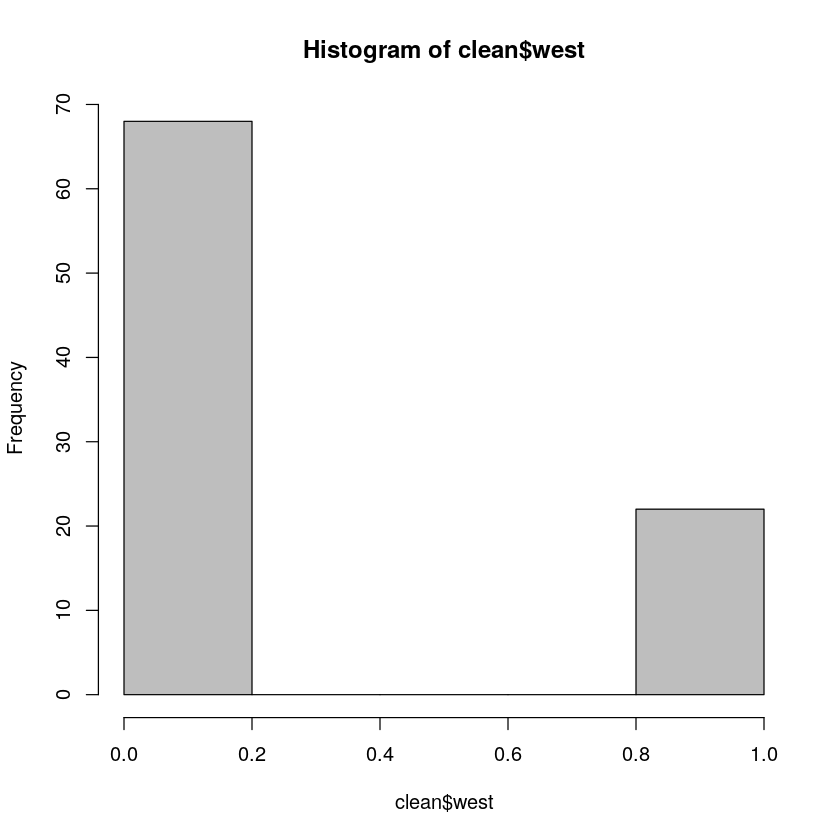

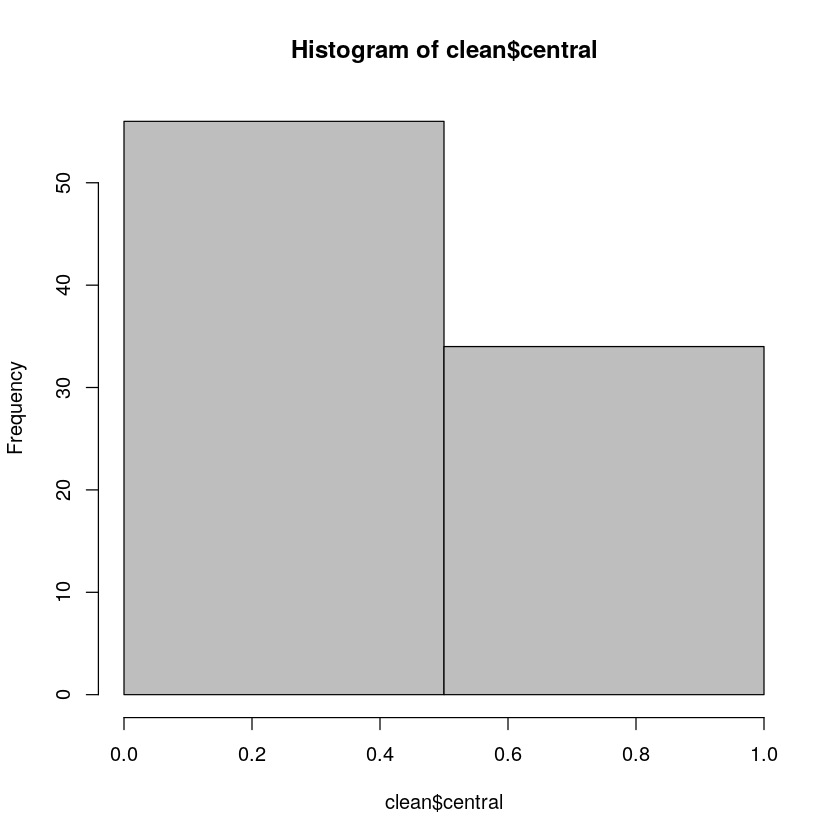

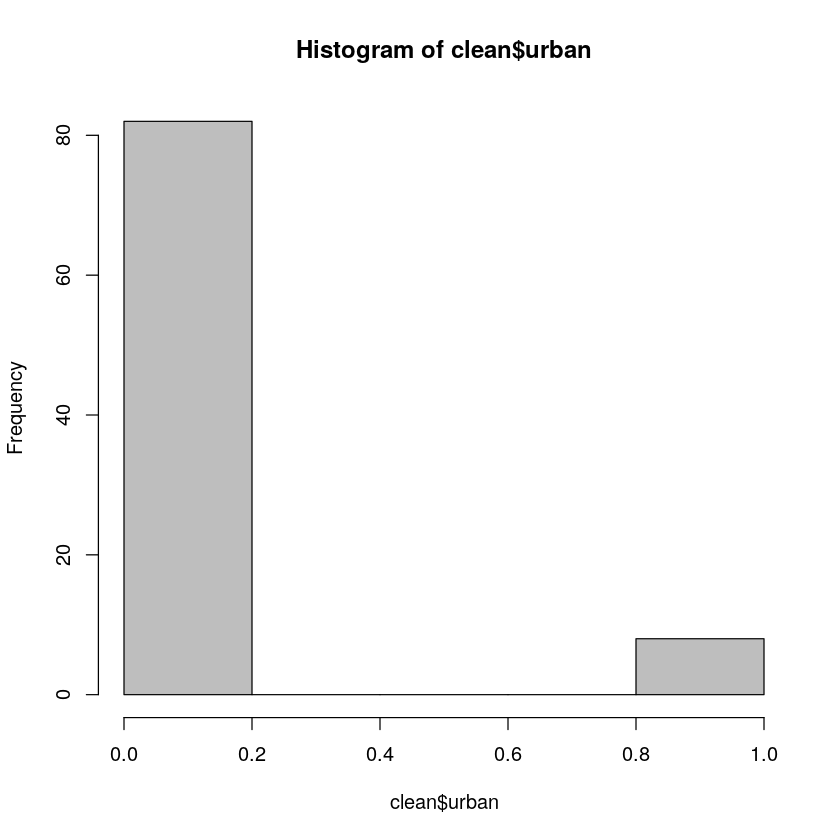

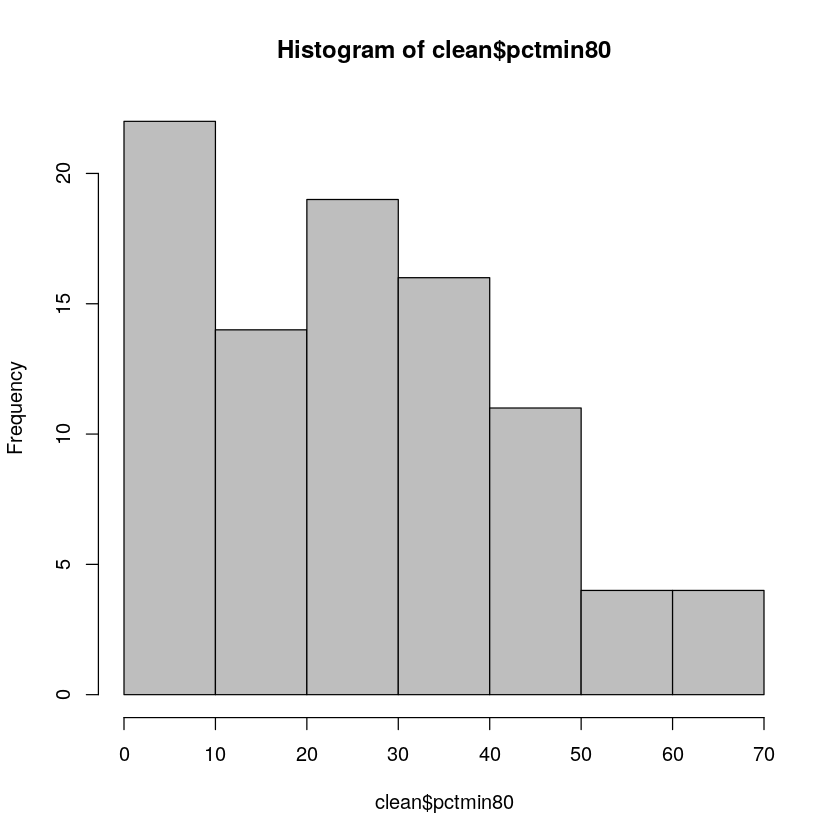

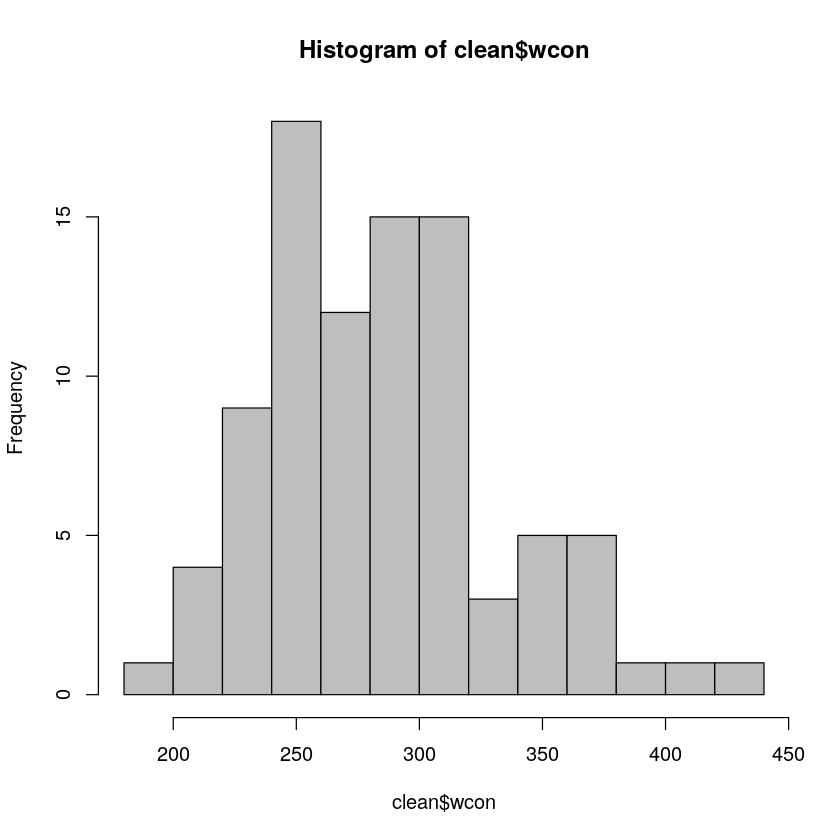

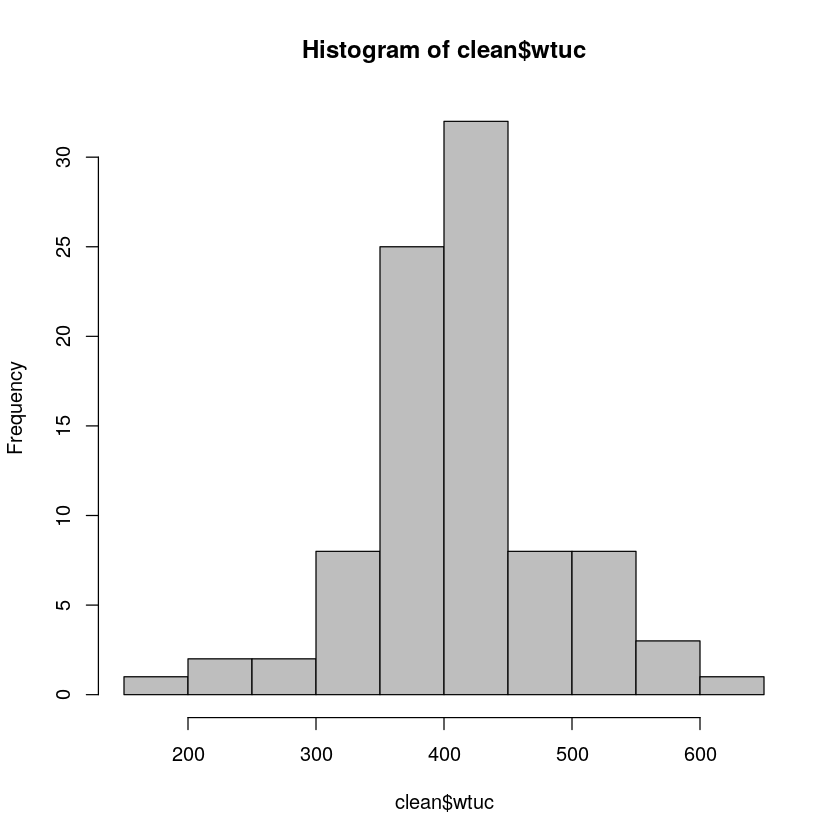

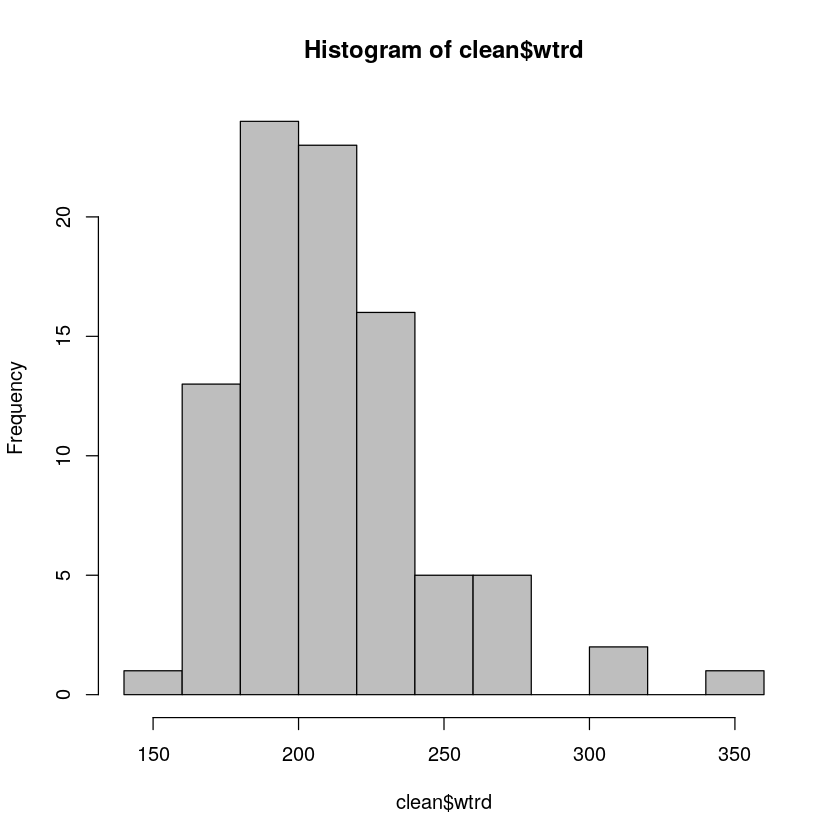

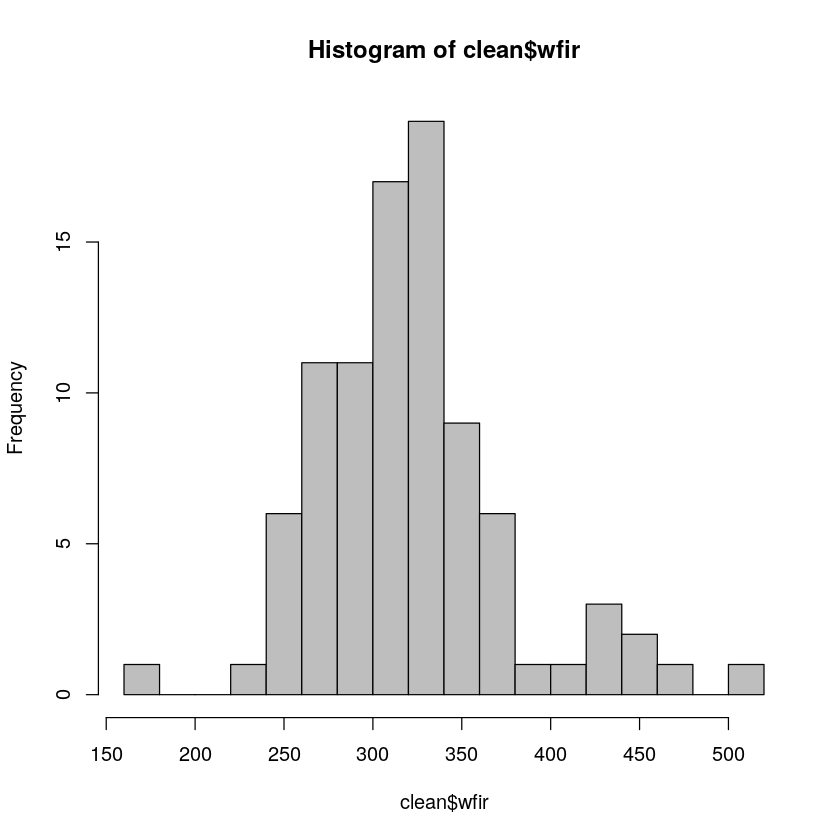

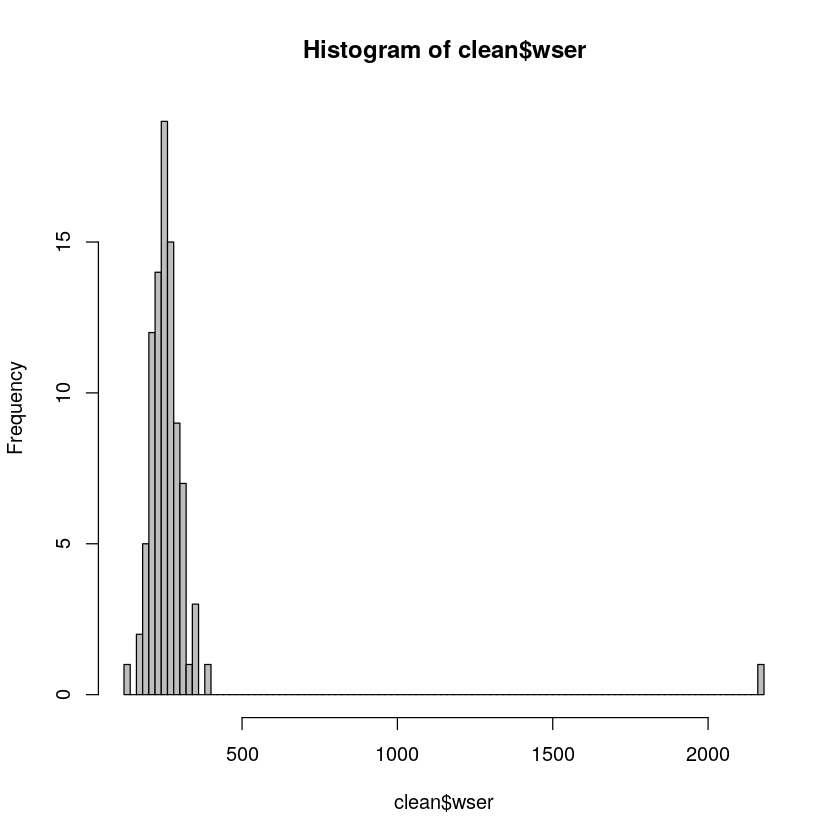

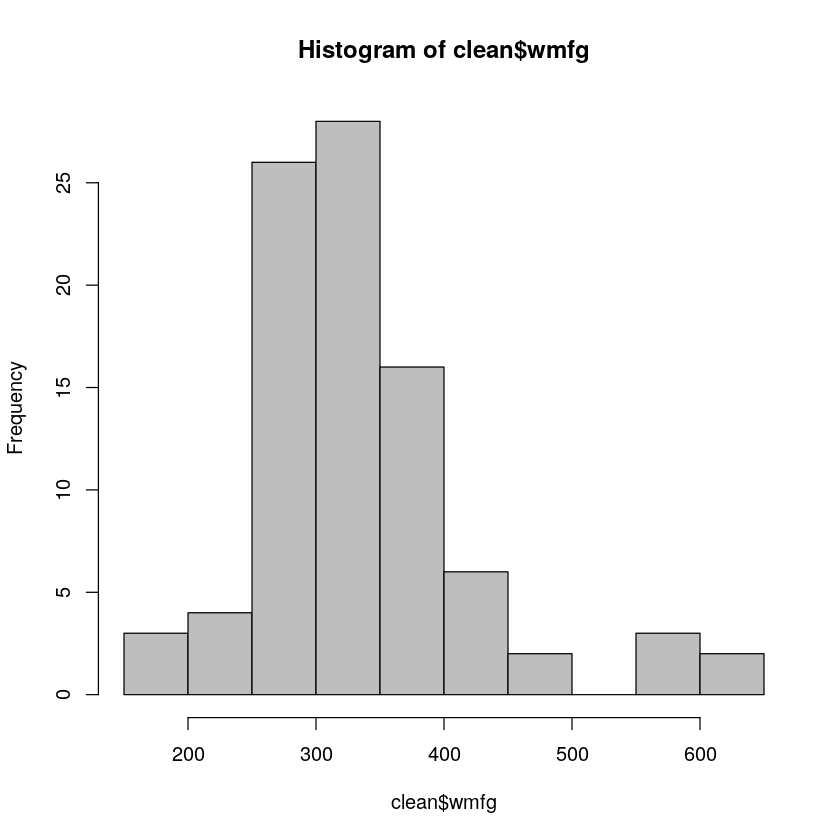

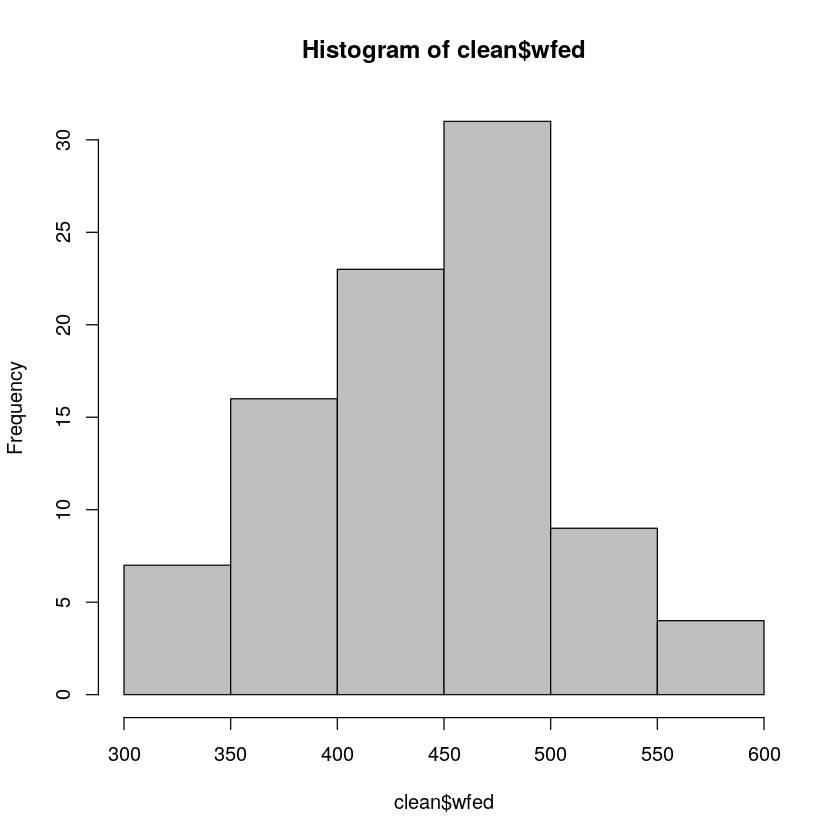

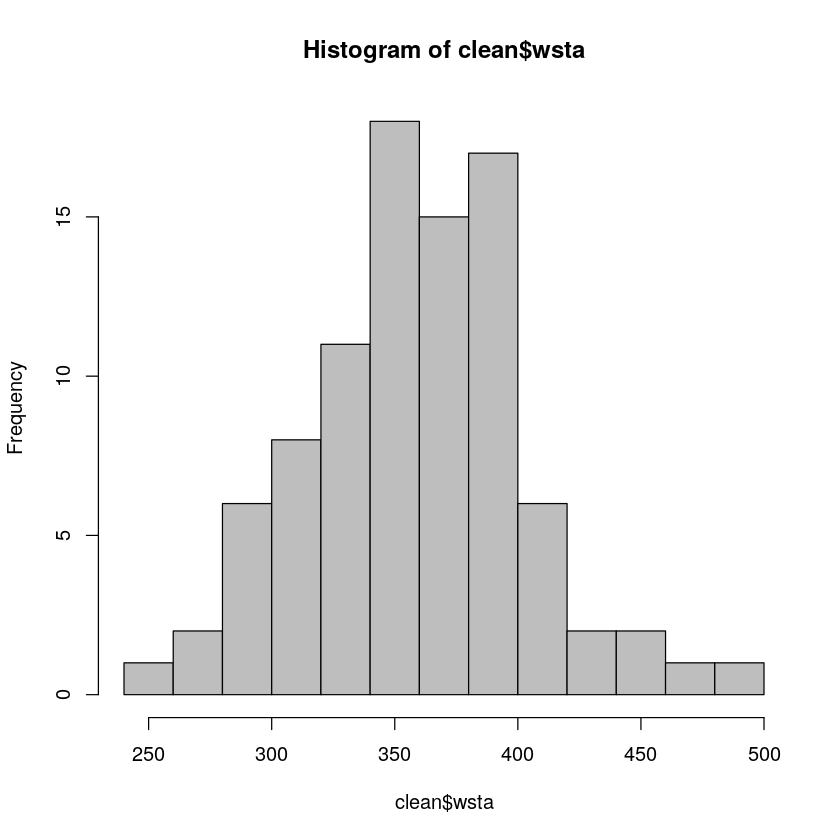

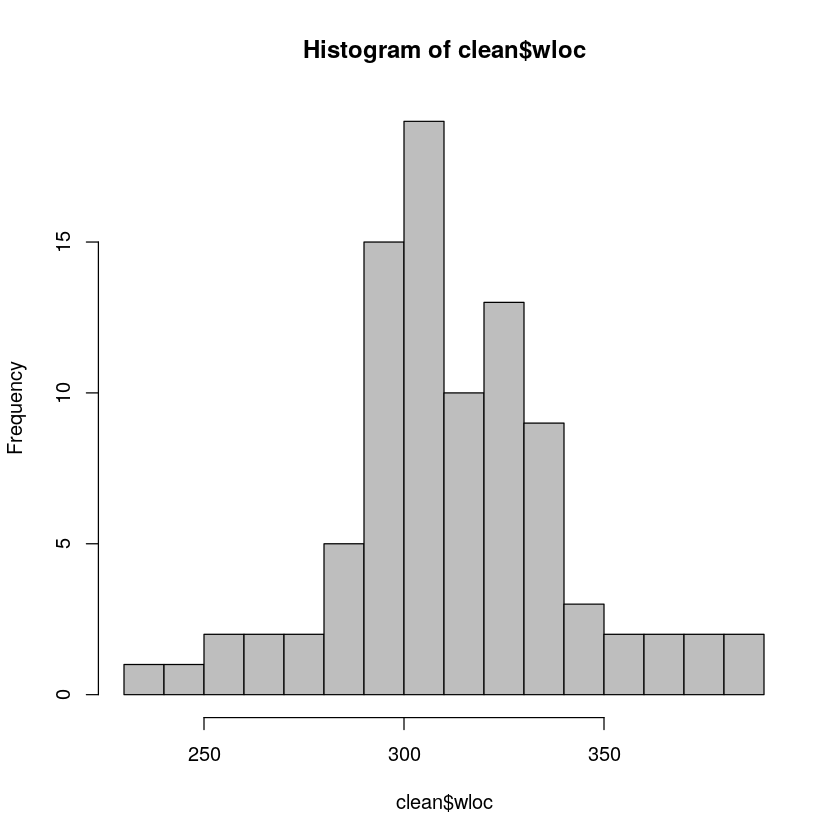

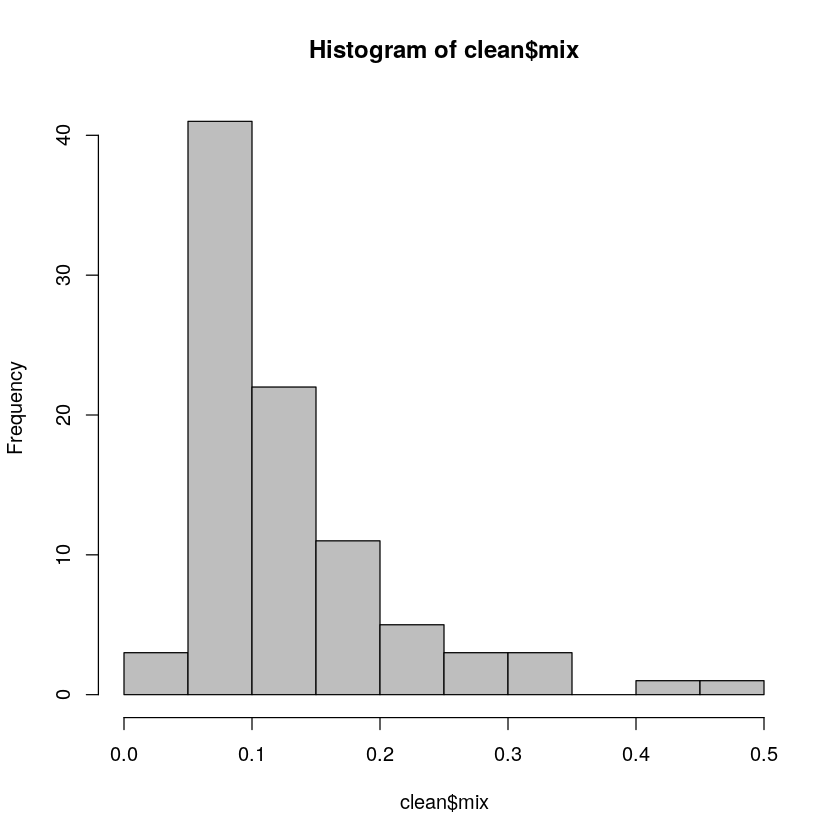

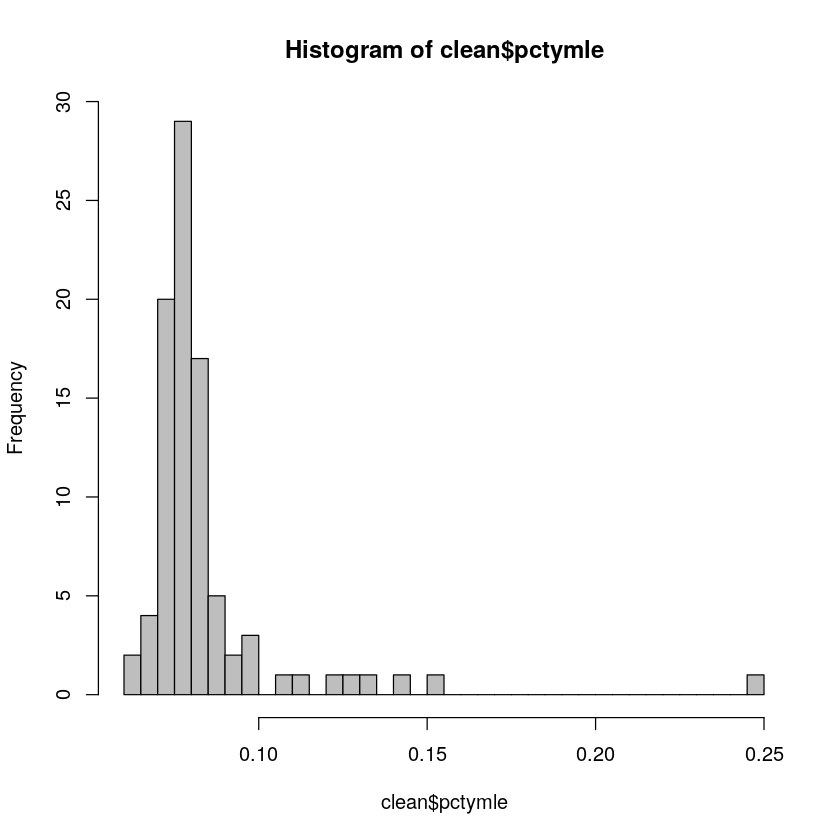

In [25]:
hist(clean$crmrte, breaks="FD", col="grey")
hist(clean$prbarr, breaks="FD", col="grey")
hist(clean$prbconv, breaks="FD", col="grey")
hist(clean$prbpris, breaks="FD", col="grey")
hist(clean$avgsen, breaks="FD", col="grey")
hist(clean$polpc, breaks="FD", col="grey")
hist(clean$density, breaks="FD", col="grey")
# The distribution is almost certainly too low by two orders of magnitude
hist(clean$taxpc, breaks="FD", col="grey")
hist(clean$west, breaks="FD", col="grey")
hist(clean$central, breaks="FD", col="grey")
hist(clean$urban, breaks="FD", col="grey")
hist(clean$pctmin80, breaks="FD", col="grey")
hist(clean$wcon, breaks="FD", col="grey")
hist(clean$wtuc, breaks="FD", col="grey")
hist(clean$wtrd, breaks="FD", col="grey")
hist(clean$wfir, breaks="FD", col="grey")
hist(clean$wser, breaks="FD", col="grey")
# Extreme outlier in service (>$2000/week)
hist(clean$wmfg, breaks="FD", col="grey")
hist(clean$wfed, breaks="FD", col="grey")
hist(clean$wsta, breaks="FD", col="grey")
hist(clean$wloc, breaks="FD", col="grey")
hist(clean$mix, breaks="FD", col="grey")
hist(clean$pctymle, breaks="FD", col="grey")

In [38]:
# There's only one value of wser that exceeds 1000. It's 10x the average.
clean[clean$wser > 1000,]

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
84,185,87,0.0108703,0.195266,2.12121,0.442857,5.38,0.0012221,0.3887588,40.82454,⋯,331.565,167.3726,264.4231,2177.068,247.72,381.33,367.25,300.13,0.04968944,0.07008217


Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”

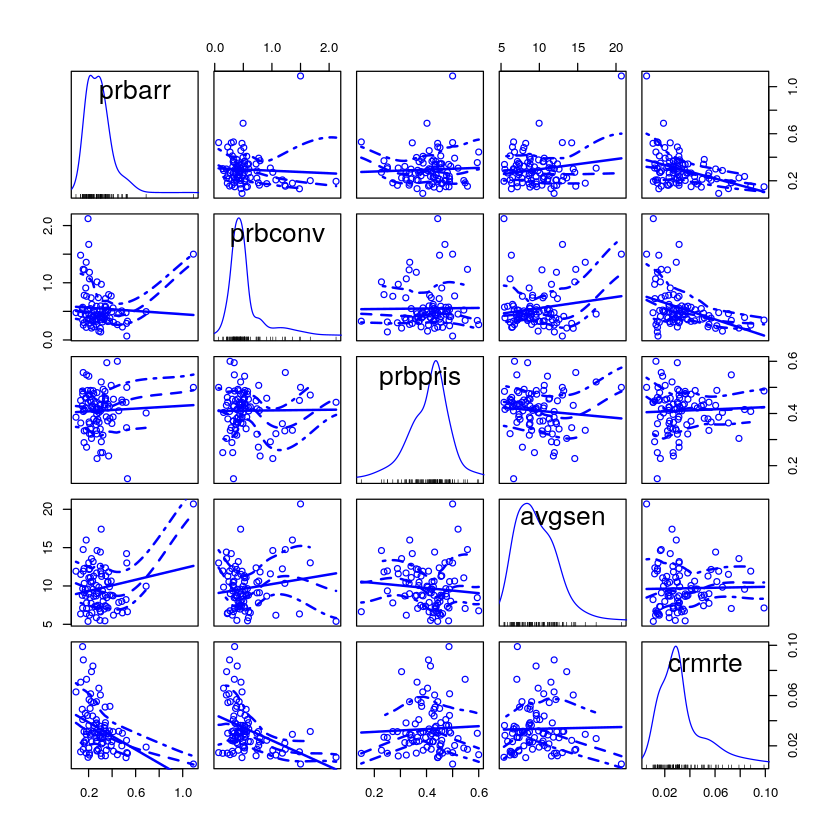

Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”Warning message in smoother(x[subs], y[subs], col = smoother.args$col[i], log.x = FALSE, :
“could not fit smooth”

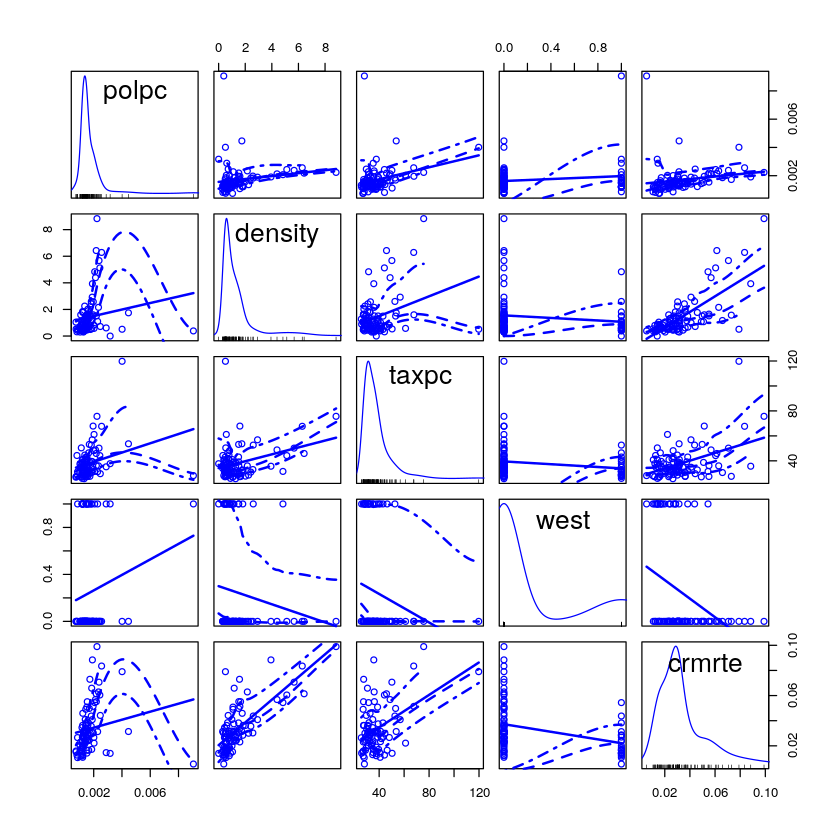

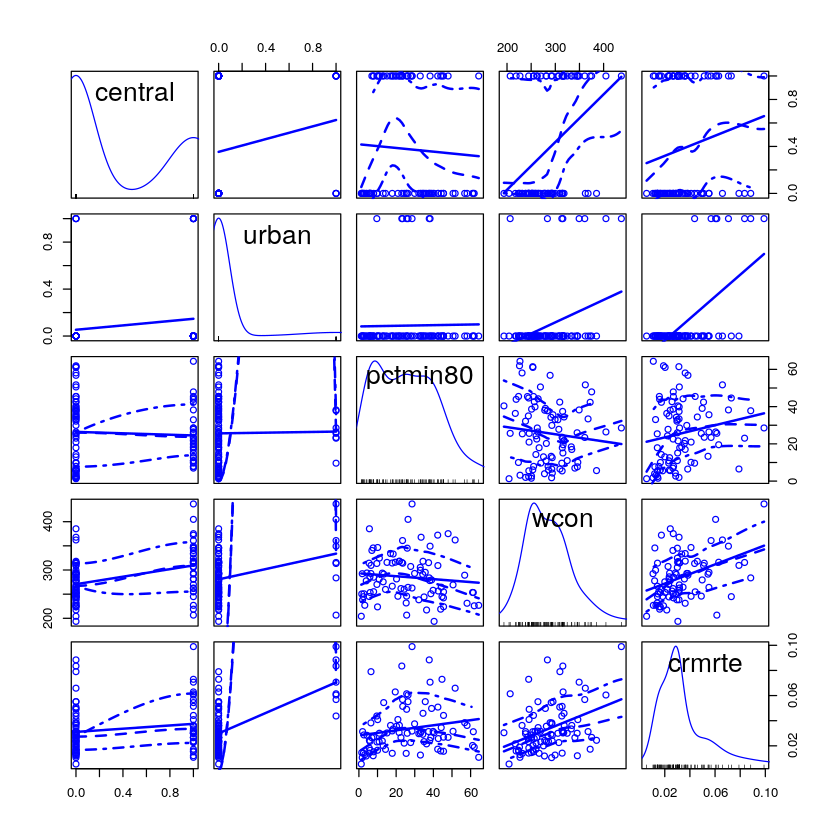

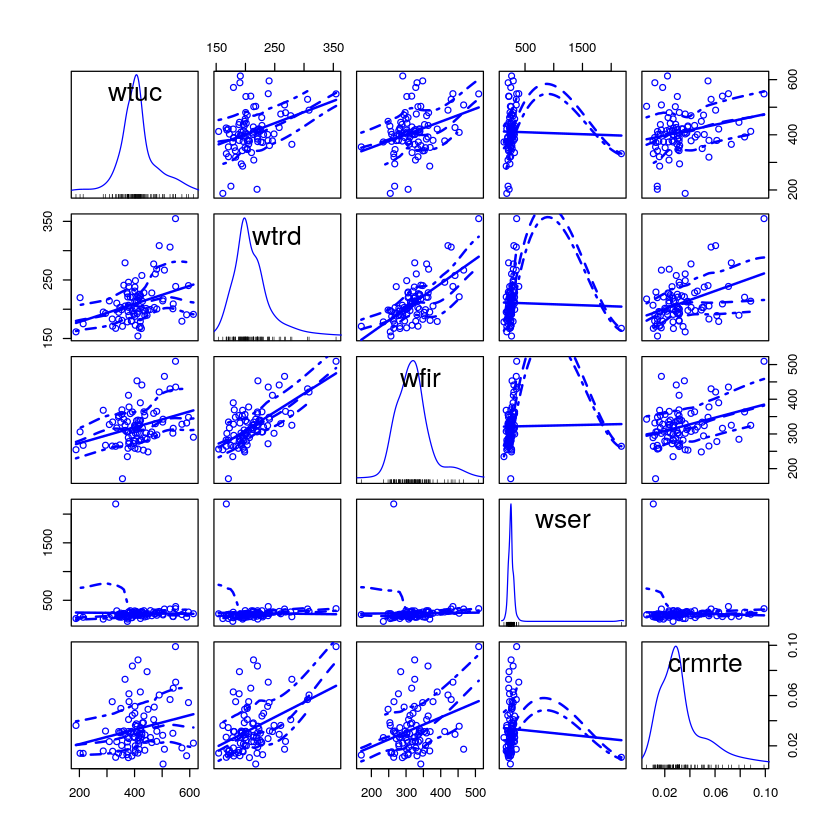

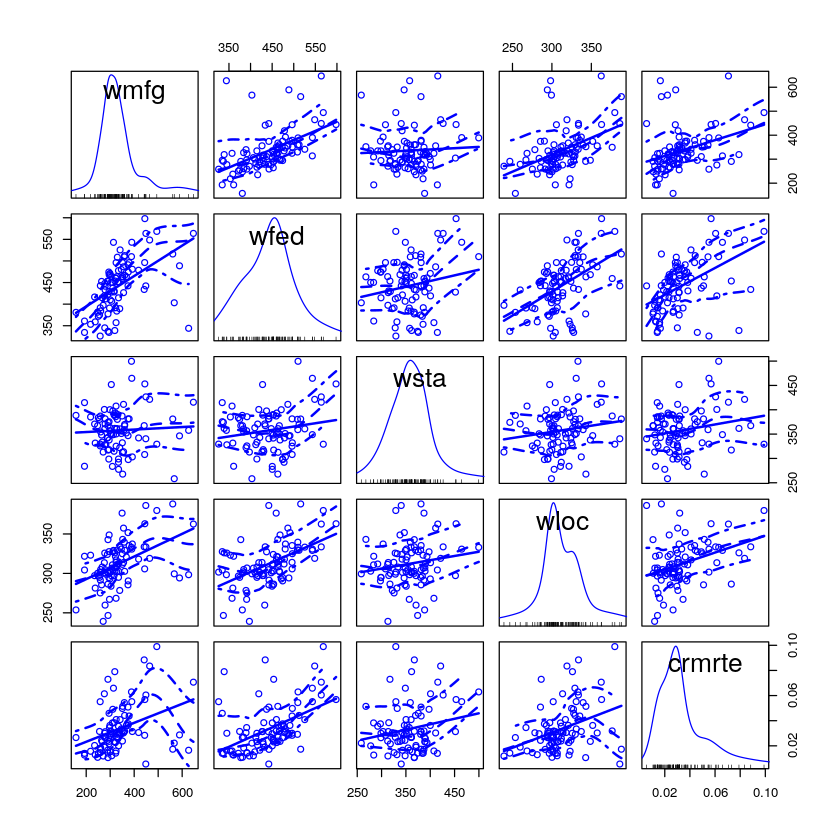

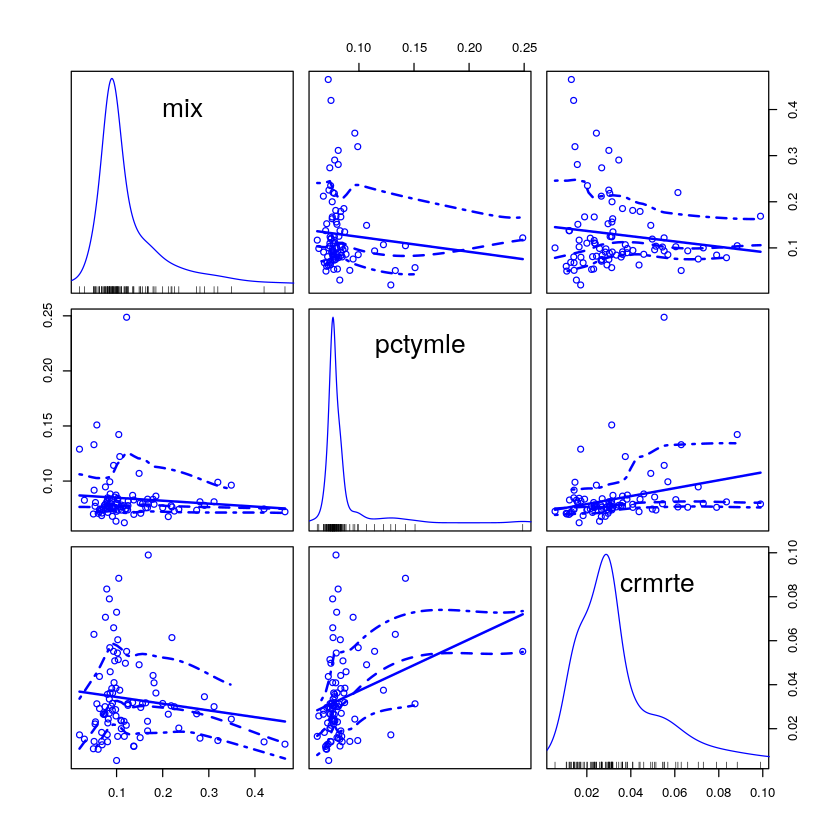

In [26]:
# Generate scatterplots against crime rate, our outcome variable of interest
scatterplotMatrix(clean[,c(4:7, 3)])
scatterplotMatrix(clean[,c(8:11, 3)])
scatterplotMatrix(clean[,c(12:15, 3)])
scatterplotMatrix(clean[,c(16:19, 3)])
scatterplotMatrix(clean[,c(20:23, 3)])
scatterplotMatrix(clean[,c(24:25, 3)])

- polpc is positively correlated (would be more so w/o one outlier)

- Hard to determine if polpc or crmrte is causal  ->

- if you have a lot of crime, you might hire a lot of police

- Density is positively correlated with crime rate 

- pctmin80 has a hump in the middle

- urban is positively correlated

- wcon is weakly positively correlated

- wtuc is weakly positively correlated

- wtrd and wfir show stronger positive correlations

- wser would be strongly positively correlated were it not for outlier

- wmfg, wfed, wsta, and wloc show positive correlations, but do they make sense?

- pctymle shows positive correlation

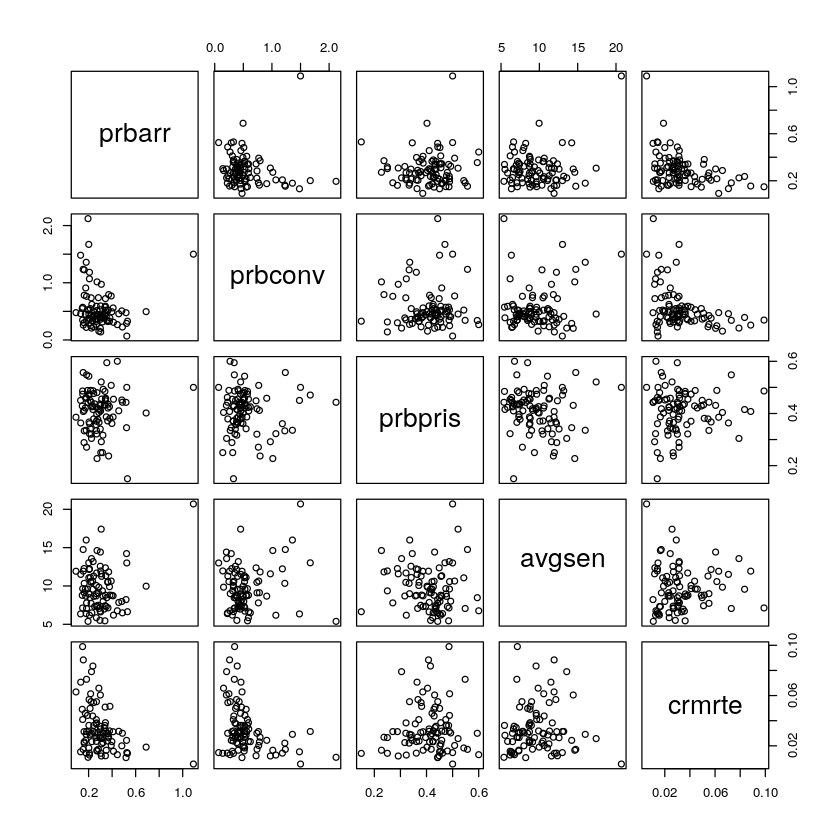

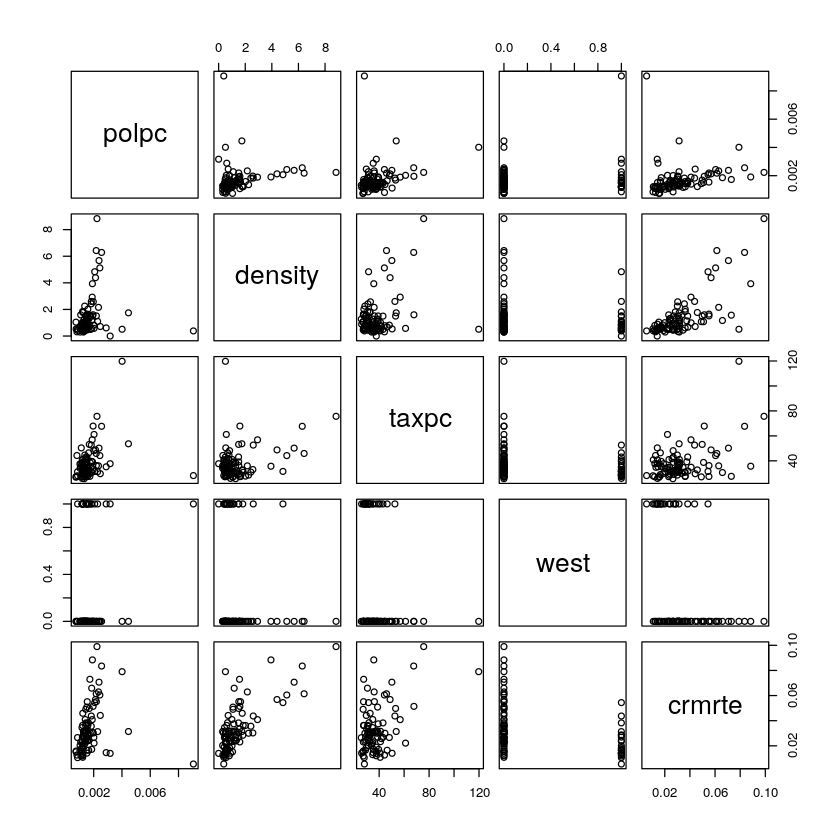

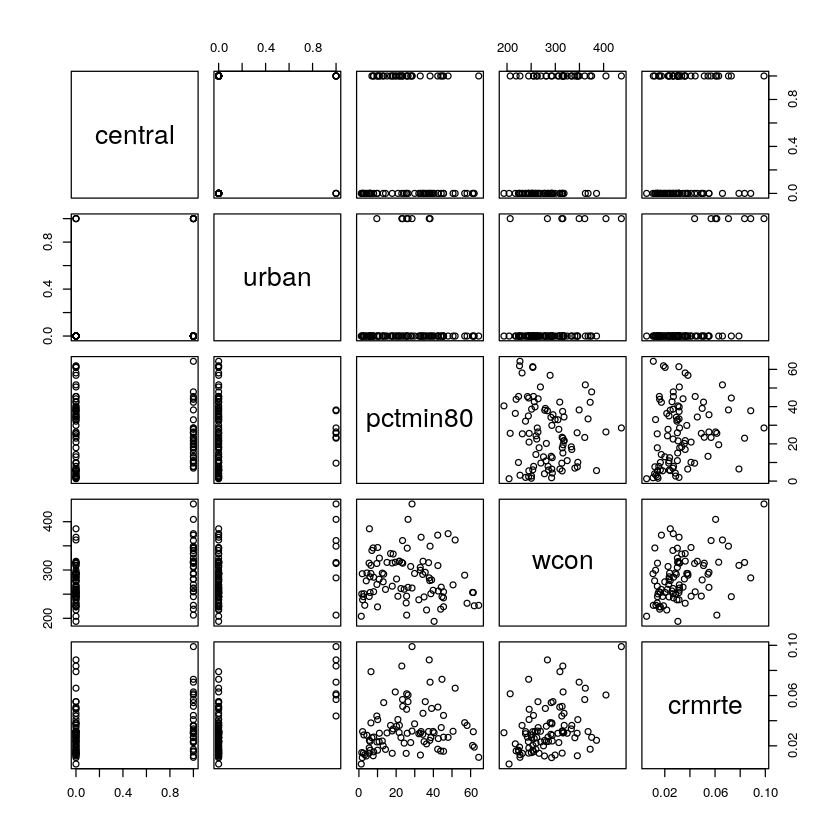

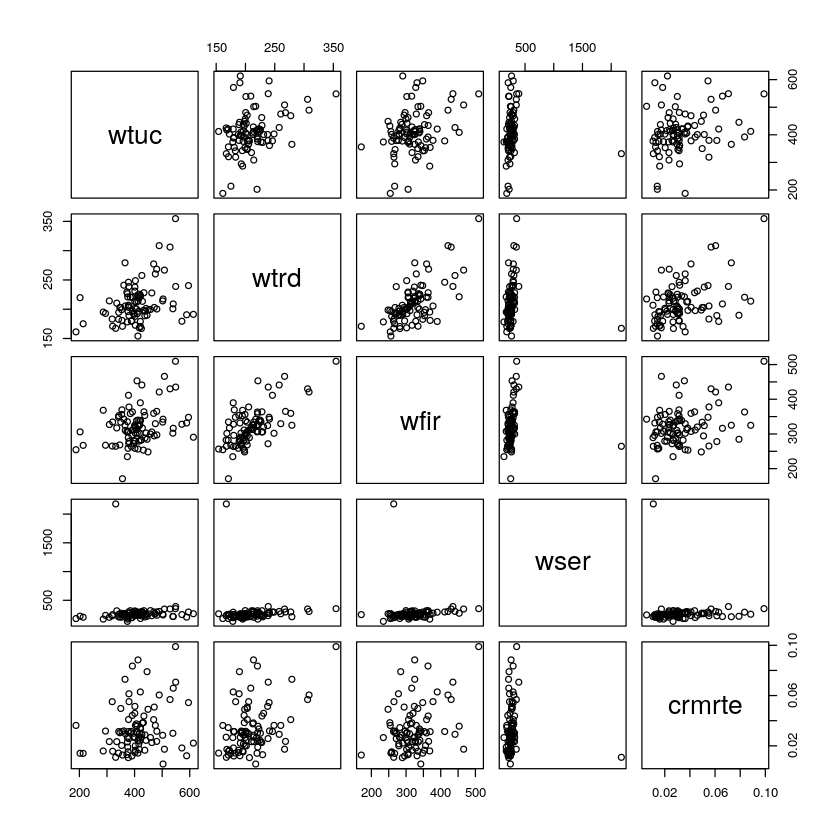

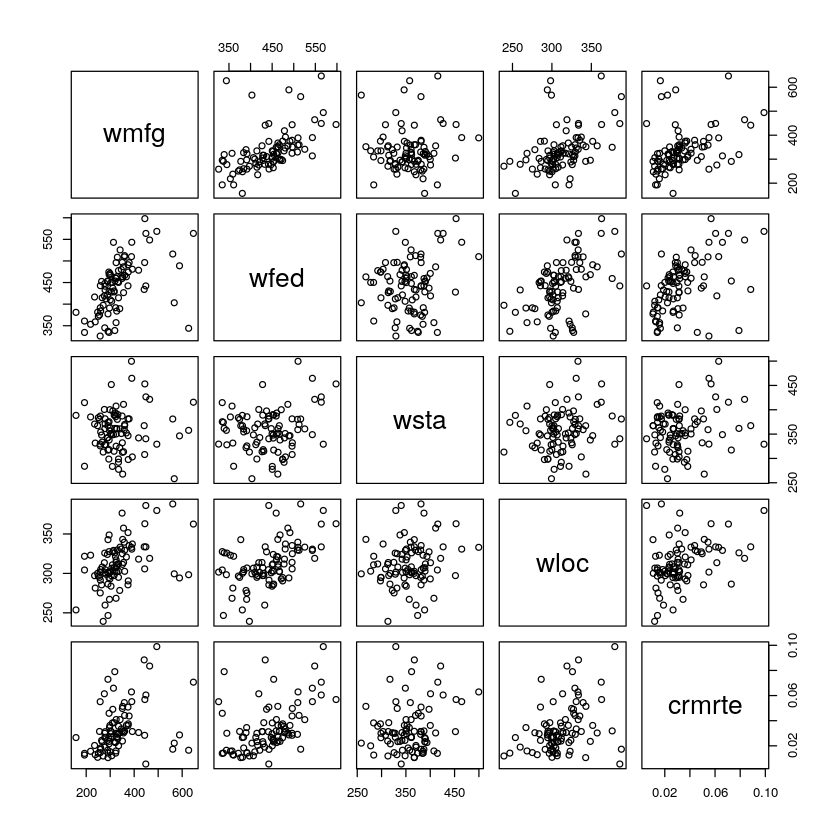

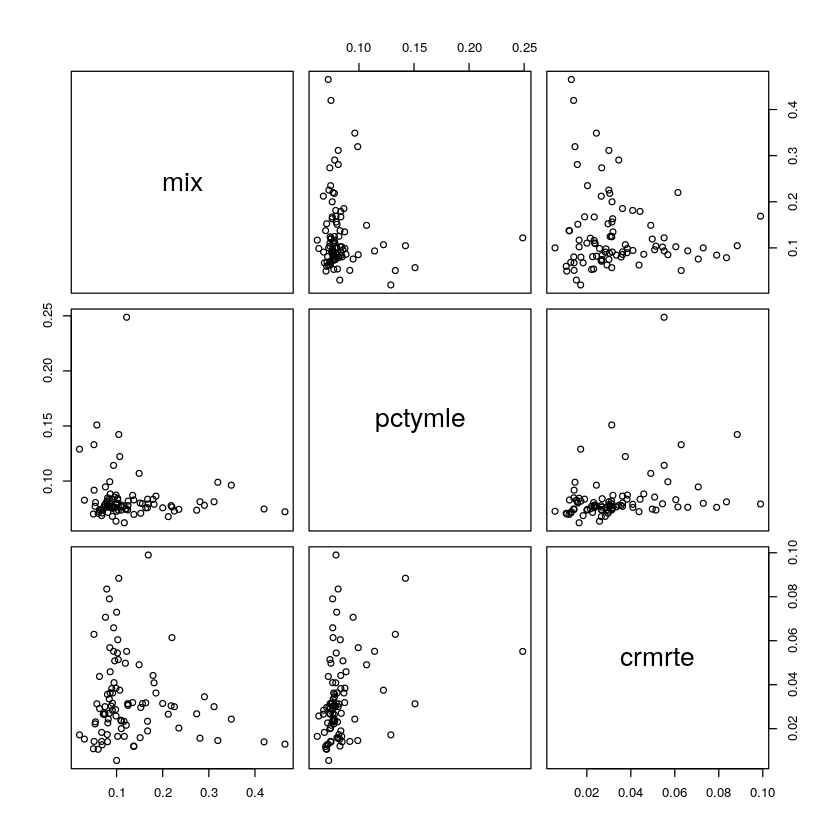

In [56]:
# Generate scatterplots against crime rate, our outcome variable of interest
plot(clean[,c(4:7, 3)])
plot(clean[,c(8:11, 3)])
plot(clean[,c(12:15, 3)])
plot(clean[,c(16:19, 3)])
plot(clean[,c(20:23, 3)])
plot(clean[,c(24:25, 3)])

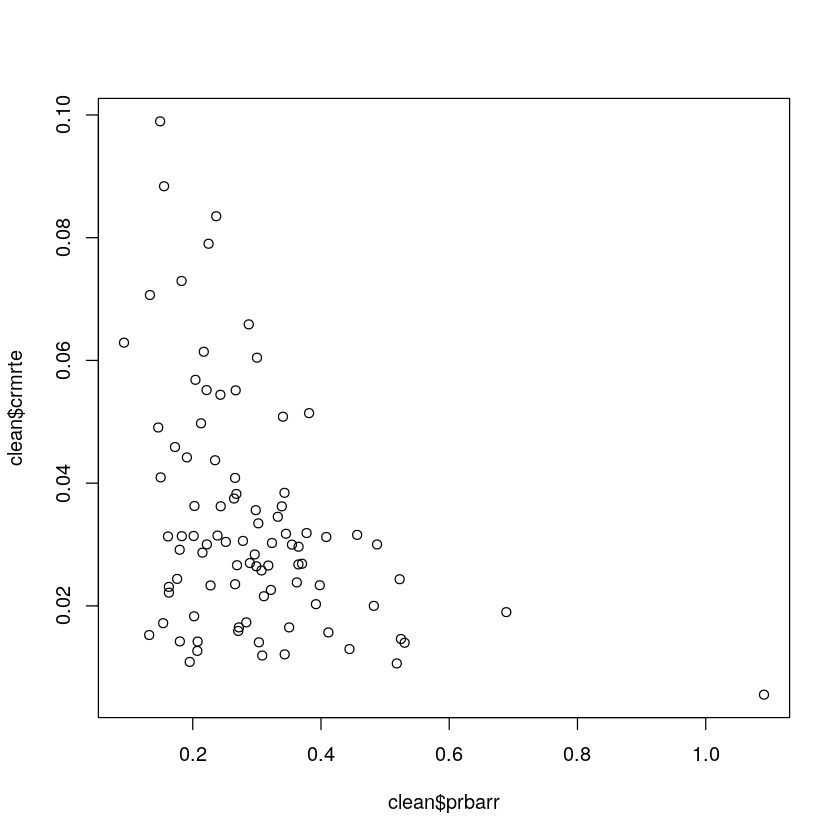

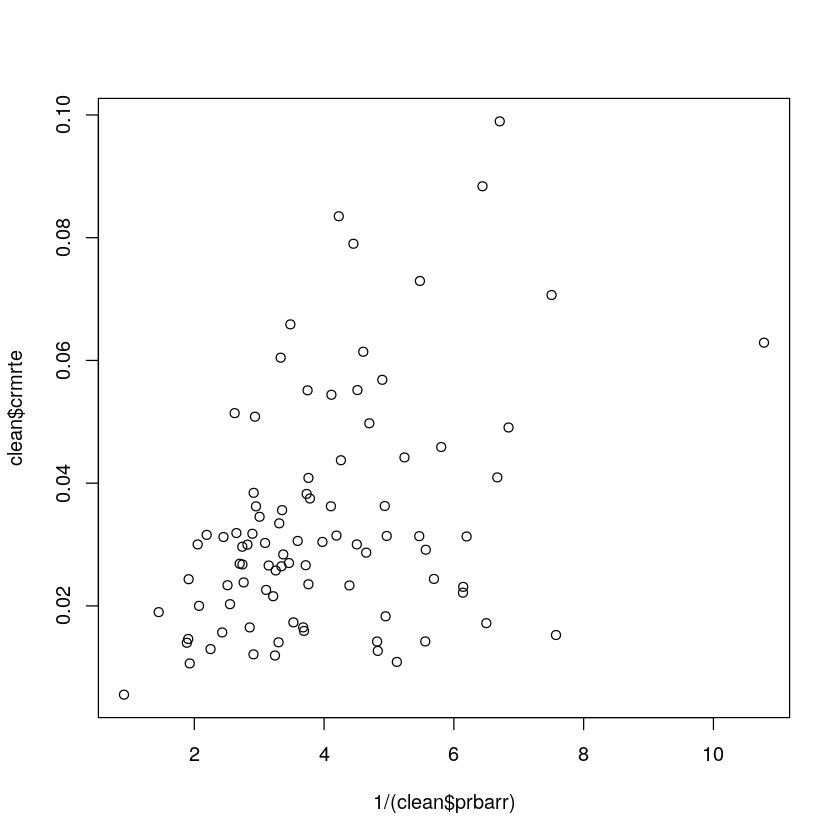

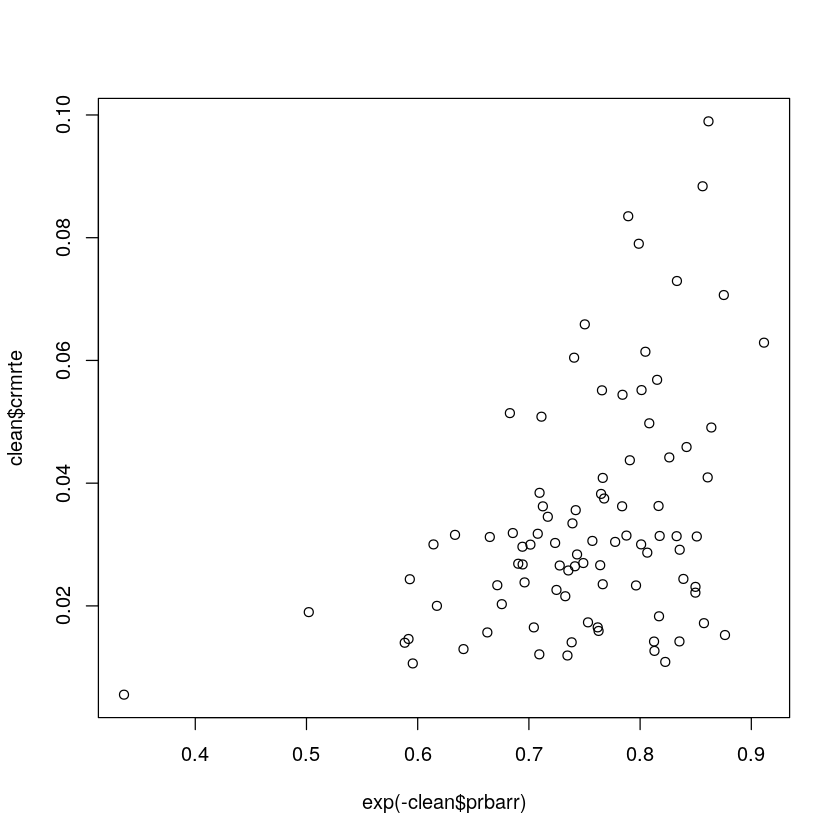

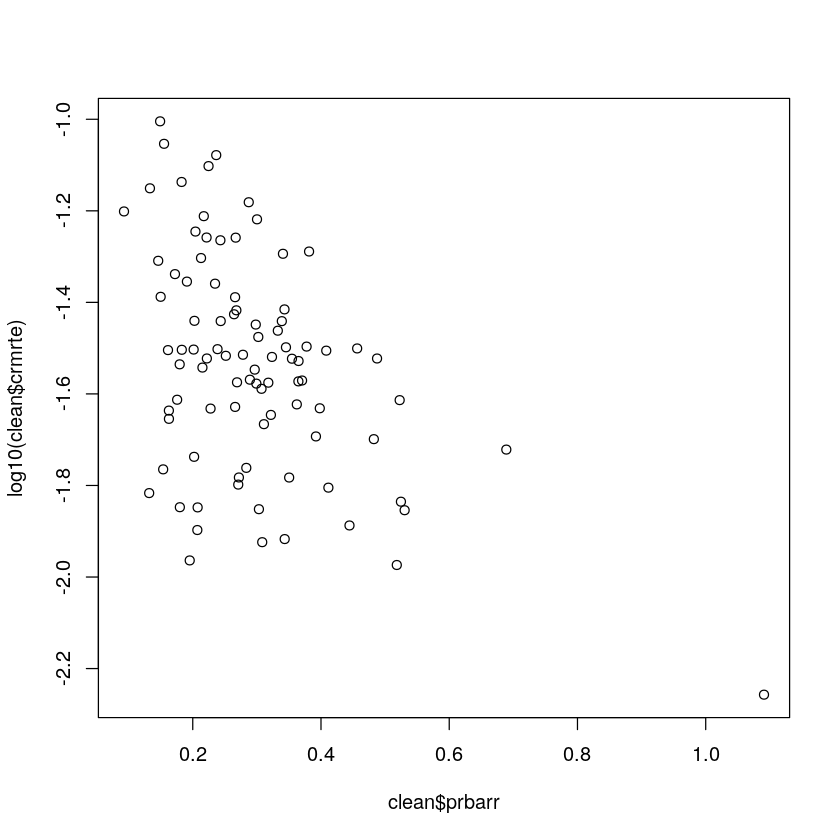

In [27]:
# Impose different transformations to visualize 'prbarr'
# Leave unaltered
plot(x=clean$prbarr, y=clean$crmrte)
plot(x=1/(clean$prbarr), y=clean$crmrte)
plot(x=exp(-clean$prbarr), y=clean$crmrte)
plot(x=clean$prbarr, y=log10(clean$crmrte))

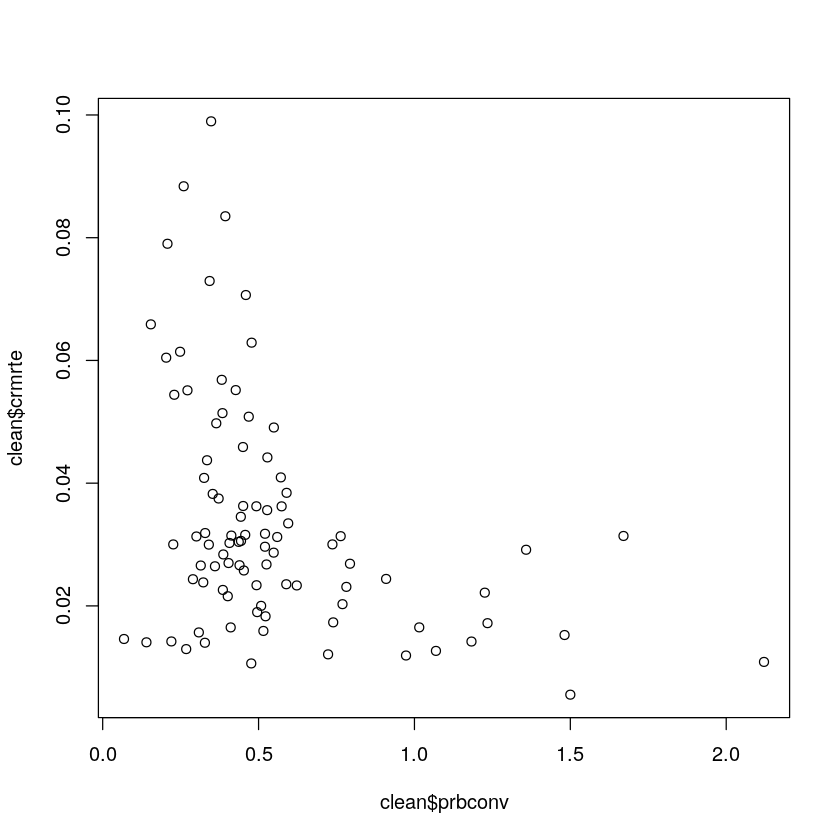

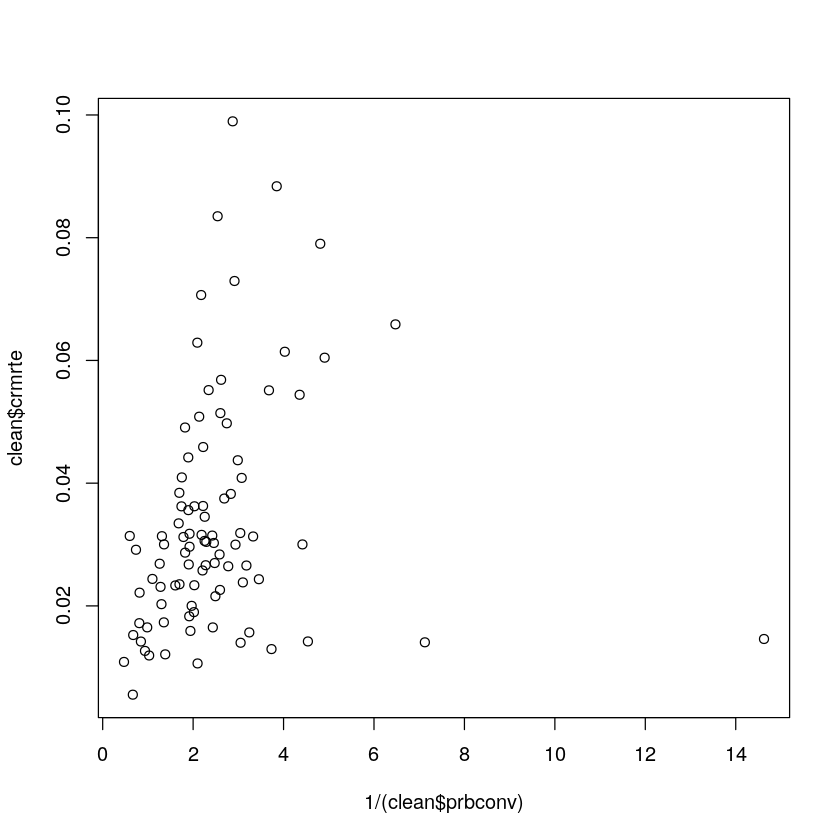

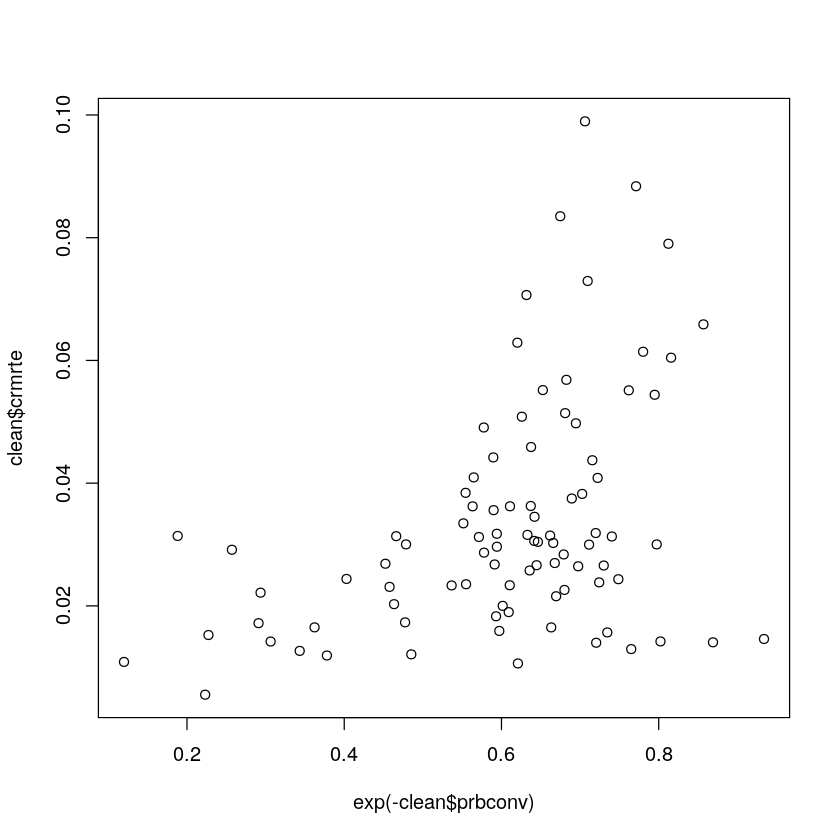

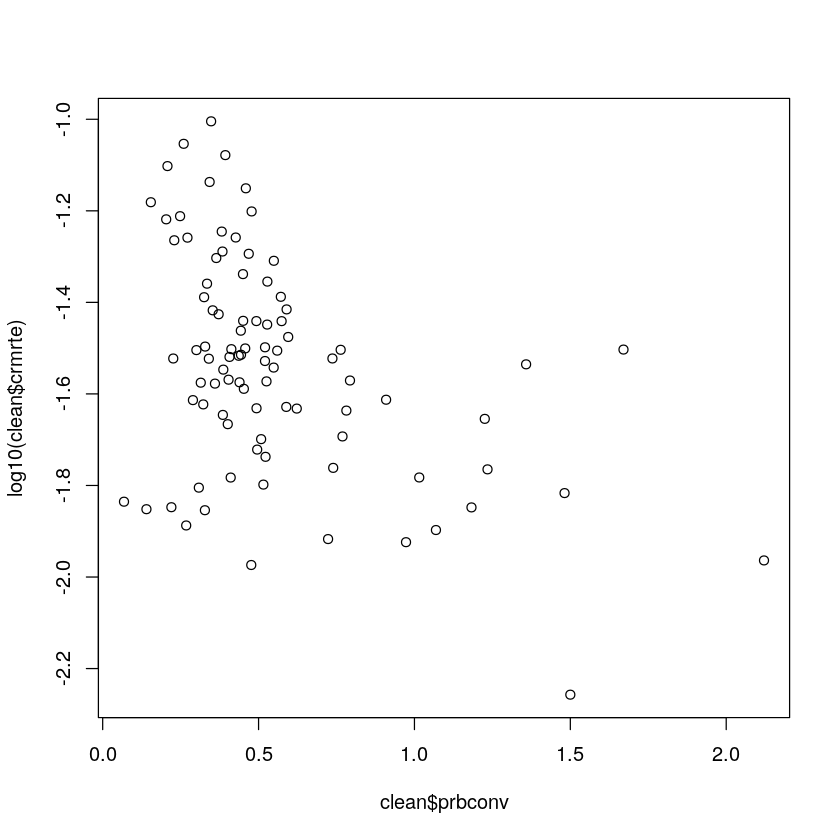

In [28]:
# Impose different transformations to visualize 'prbconv'
plot(x=clean$prbconv, y=clean$crmrte)
# One below is good
plot(x=1/(clean$prbconv), y=clean$crmrte)
plot(x=exp(-clean$prbconv), y=clean$crmrte)
plot(x=clean$prbconv, y=log10(clean$crmrte))

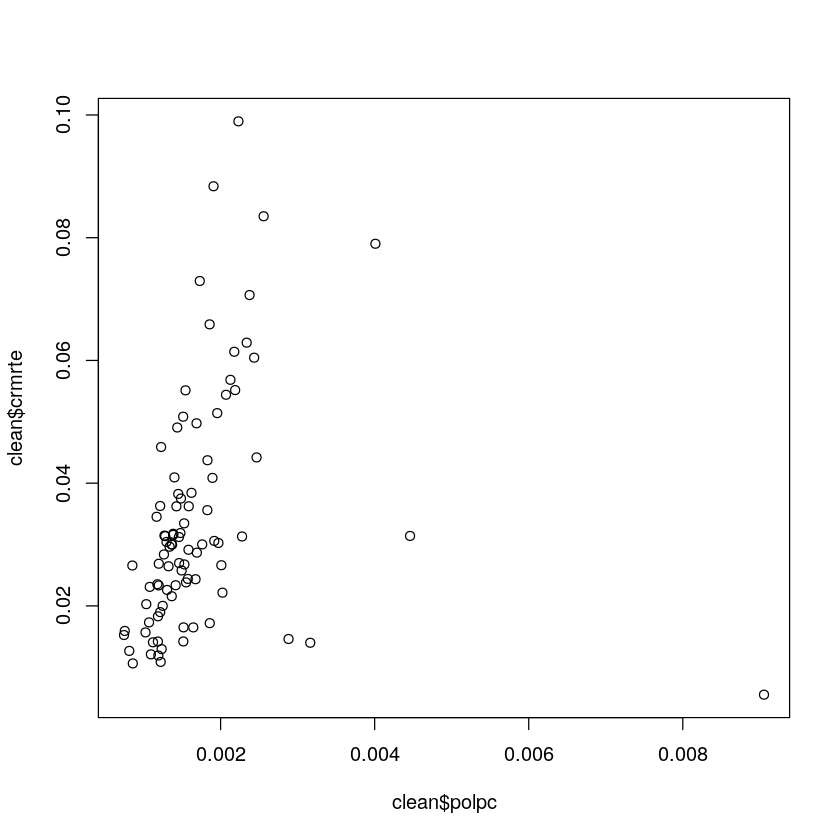

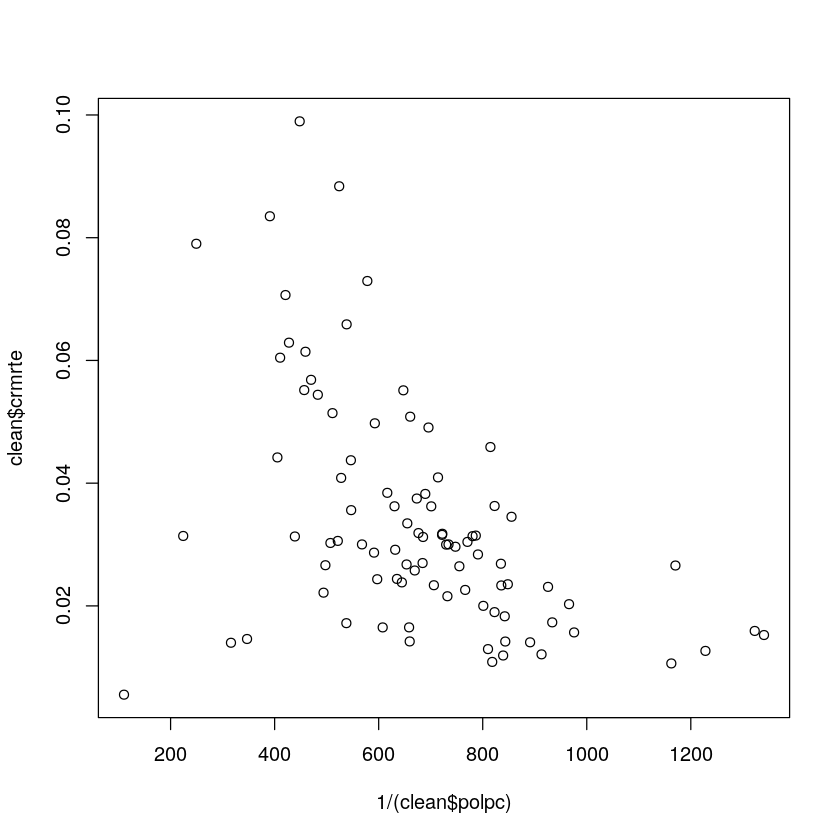

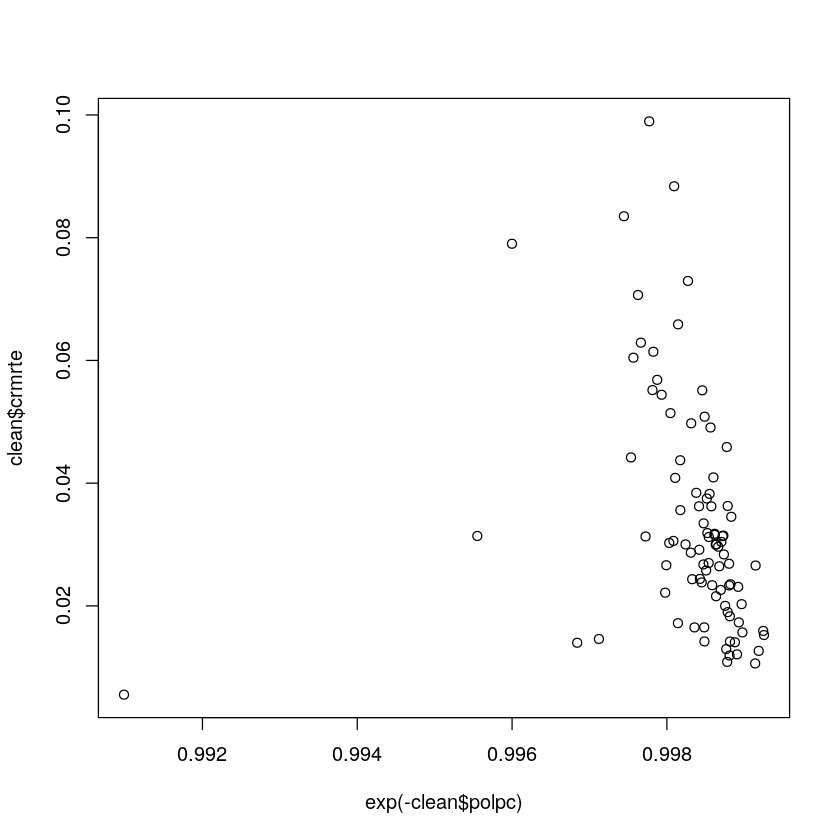

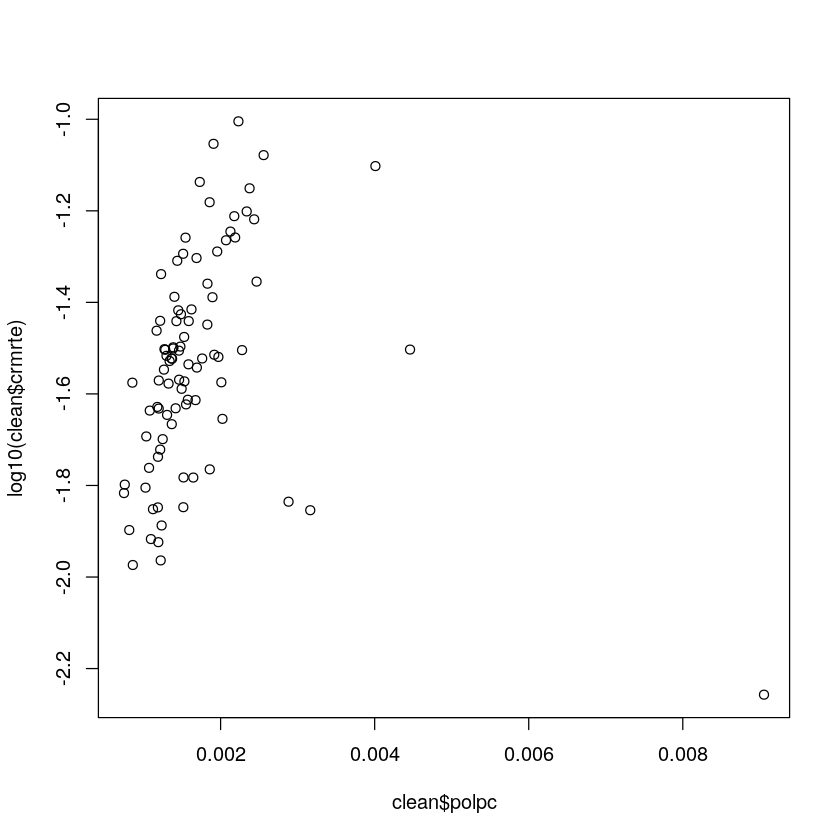

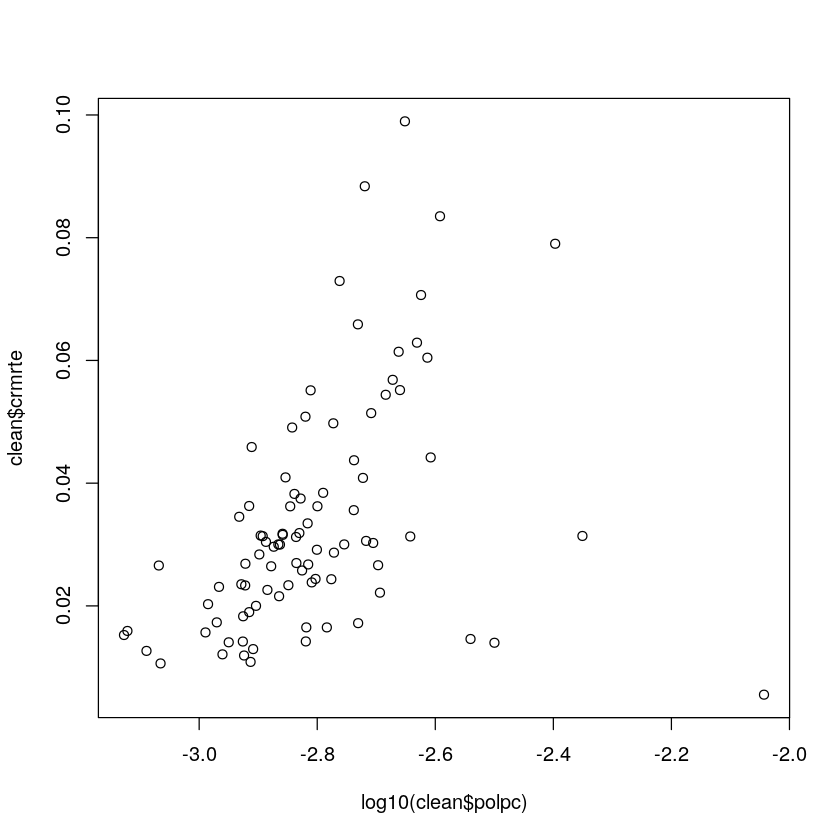

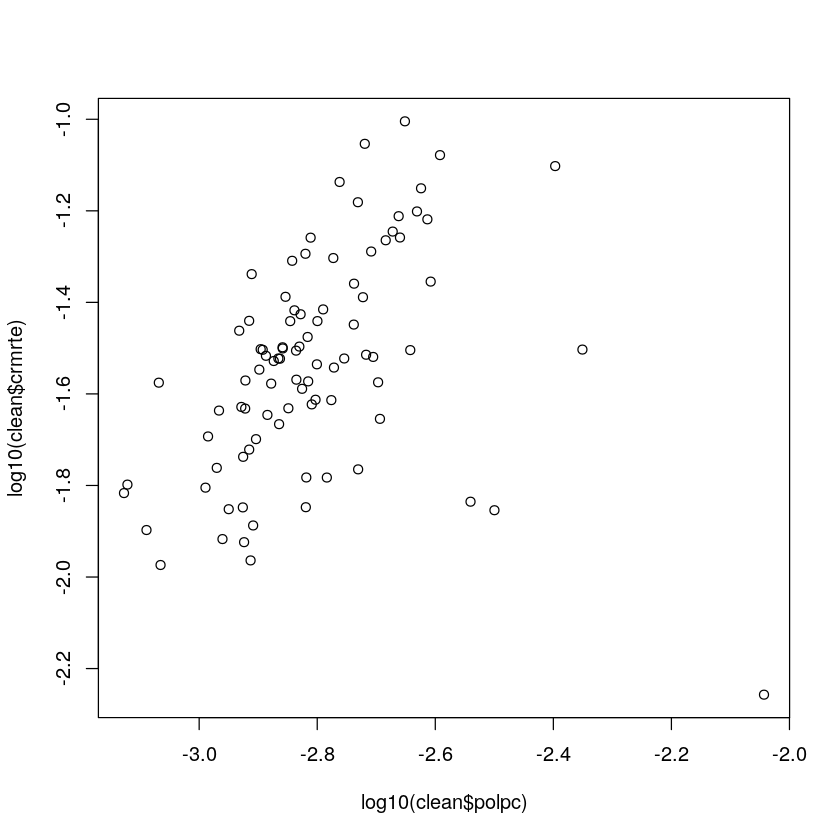

In [29]:
# Impose different transformations to visualize 'polpc'
plot(x=clean$polpc, y=clean$crmrte)
plot(x=1/(clean$polpc), y=clean$crmrte)
plot(x=exp(-clean$polpc), y=clean$crmrte)
# One below is good
plot(x=clean$polpc, y=log10(clean$crmrte))
plot(x=log10(clean$polpc), y=clean$crmrte)
plot(x=log10(clean$polpc), y=log10(clean$crmrte))

# Regressions of Crime Rate on Each Variable Individually

In [40]:
# Regression of 'crmrte' on 'county'
probs <- lm(clean$crmrte ~ clean$county)
probs$coefficients
summary(probs)

(Intercept) clean$county 
3.283252e-02 6.733653e-06


Call:
lm(formula = clean$crmrte ~ clean$county)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.028074 -0.012578 -0.003471  0.006879  0.065332 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.283e-02  4.008e-03   8.191 1.88e-12 ***
clean$county 6.734e-06  3.452e-05   0.195    0.846    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01899 on 88 degrees of freedom
Multiple R-squared:  0.0004323,	Adjusted R-squared:  -0.01093 
F-statistic: 0.03805 on 1 and 88 DF,  p-value: 0.8458


In [43]:
# Regression of 'crmrte' on 'prbarr'
probs <- lm(clean$crmrte ~ clean$prbarr)
probs$coefficients
summary(probs)

(Intercept) clean$prbarr 
  0.04952001  -0.05422781


Call:
lm(formula = clean$crmrte ~ clean$prbarr)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.028061 -0.010754 -0.003169  0.006823  0.057531 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.049520   0.004372  11.328  < 2e-16 ***
clean$prbarr -0.054228   0.013433  -4.037 0.000115 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01745 on 88 degrees of freedom
Multiple R-squared:  0.1562,	Adjusted R-squared:  0.1467 
F-statistic:  16.3 on 1 and 88 DF,  p-value: 0.0001153


In [44]:
# Regression of 'crmrte' on 'prbconv'
probs <- lm(clean$crmrte ~ clean$prbconv)
probs$coefficients
summary(probs)

(Intercept) clean$prbconv 
   0.04484728   -0.02058116


Call:
lm(formula = clean$crmrte ~ clean$prbconv)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.028833 -0.010178 -0.004177  0.009223  0.061277 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.044847   0.003429  13.080  < 2e-16 ***
clean$prbconv -0.020581   0.005244  -3.925 0.000172 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01752 on 88 degrees of freedom
Multiple R-squared:  0.149,	Adjusted R-squared:  0.1393 
F-statistic:  15.4 on 1 and 88 DF,  p-value: 0.0001719


In [45]:
# Regression of 'crmrte' on 'prbpris'
probs <- lm(clean$crmrte ~ clean$prbpris)
probs$coefficients
summary(probs)

(Intercept) clean$prbpris 
   0.02889595    0.01123646


Call:
lm(formula = clean$crmrte ~ clean$prbpris)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.028981 -0.013582 -0.003920  0.006475  0.064607 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)    0.02890    0.01043   2.771  0.00683 **
clean$prbpris  0.01124    0.02493   0.451  0.65327   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01897 on 88 degrees of freedom
Multiple R-squared:  0.002304,	Adjusted R-squared:  -0.009034 
F-statistic: 0.2032 on 1 and 88 DF,  p-value: 0.6533


In [46]:
# Regression of 'crmrte' on 'avgsen'
probs <- lm(clean$crmrte ~ clean$avgsen)
probs$coefficients
summary(probs)

(Intercept) clean$avgsen 
0.0322317650 0.0001319201


Call:
lm(formula = clean$crmrte ~ clean$avgsen)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.029429 -0.012994 -0.003477  0.006732  0.065794 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0322318  0.0071665   4.498 2.09e-05 ***
clean$avgsen 0.0001319  0.0007102   0.186    0.853    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01899 on 88 degrees of freedom
Multiple R-squared:  0.0003919,	Adjusted R-squared:  -0.01097 
F-statistic: 0.0345 on 1 and 88 DF,  p-value: 0.8531


In [47]:
# Regression of 'crmrte' on 'polpc'
probs <- lm(clean$crmrte ~ clean$polpc)
probs$coefficients
summary(probs)

(Intercept) clean$polpc 
 0.02806423  3.18839274


Call:
lm(formula = clean$crmrte ~ clean$polpc)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.051400 -0.011799 -0.003837  0.006455  0.063787 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.02806    0.00395   7.105 2.99e-10 ***
clean$polpc  3.18839    2.00318   1.592    0.115    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01873 on 88 degrees of freedom
Multiple R-squared:  0.02798,	Adjusted R-squared:  0.01694 
F-statistic: 2.533 on 1 and 88 DF,  p-value: 0.115


## Density accounts for a ton (53% of variation) of crime rate

In [48]:
# Regression of 'crmrte' on 'density'
probs <- lm(clean$crmrte ~ clean$density)
probs$coefficients
summary(probs)

(Intercept) clean$density 
  0.020529697   0.009041231


Call:
lm(formula = clean$crmrte ~ clean$density)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.018485 -0.009495 -0.002767  0.004877  0.053862 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.0205297  0.0018911  10.856  < 2e-16 ***
clean$density 0.0090412  0.0009067   9.972  4.1e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01301 on 88 degrees of freedom
Multiple R-squared:  0.5305,	Adjusted R-squared:  0.5252 
F-statistic: 99.44 on 1 and 88 DF,  p-value: 4.101e-16


## taxpc also accounts for a lot (19% of variation)

In [49]:
# Regression of 'crmrte' on 'taxpc'
probs <- lm(clean$crmrte ~ clean$taxpc)
probs$coefficients
summary(probs)

(Intercept) clean$taxpc 
0.008844424 0.000646353


Call:
lm(formula = clean$crmrte ~ clean$taxpc)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.027343 -0.010886 -0.002133  0.006679  0.056466 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0088444  0.0055339   1.598    0.114    
clean$taxpc 0.0006464  0.0001372   4.710 9.18e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01697 on 88 degrees of freedom
Multiple R-squared:  0.2013,	Adjusted R-squared:  0.1923 
F-statistic: 22.19 on 1 and 88 DF,  p-value: 9.181e-06


## west Explains 11% of Variation

In [50]:
# Regression of 'crmrte' on 'west'
probs <- lm(clean$crmrte ~ clean$west)
probs$coefficients
summary(probs)

(Intercept)  clean$west 
 0.03720145 -0.01510170


Call:
lm(formula = clean$crmrte ~ clean$west)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.026331 -0.010609 -0.005616  0.006890  0.061764 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.037201   0.002161  17.211  < 2e-16 ***
clean$west  -0.015102   0.004372  -3.454 0.000851 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01782 on 88 degrees of freedom
Multiple R-squared:  0.1194,	Adjusted R-squared:  0.1094 
F-statistic: 11.93 on 1 and 88 DF,  p-value: 0.0008507


In [51]:
# Regression of 'crmrte' on 'central'
probs <- lm(clean$crmrte ~ clean$central)
probs$coefficients
summary(probs)

(Intercept) clean$central 
  0.031082327   0.006425994


Call:
lm(formula = clean$crmrte ~ clean$central)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.026638 -0.013454 -0.004356  0.007047  0.061458 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.031082   0.002503  12.418   <2e-16 ***
clean$central 0.006426   0.004072   1.578    0.118    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01873 on 88 degrees of freedom
Multiple R-squared:  0.02752,	Adjusted R-squared:  0.01647 
F-statistic:  2.49 on 1 and 88 DF,  p-value: 0.1182


## urban Explains 38% of Variation

In [52]:
# Regression of 'crmrte' on 'urban'
probs <- lm(clean$crmrte ~ clean$urban)
probs$coefficients
summary(probs)

(Intercept) clean$urban 
 0.02990170  0.04059258


Call:
lm(formula = clean$crmrte ~ clean$urban)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.026759 -0.010699 -0.001371  0.006329  0.049115 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.029902   0.001654  18.080  < 2e-16 ***
clean$urban 0.040593   0.005547   7.318 1.12e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01498 on 88 degrees of freedom
Multiple R-squared:  0.3783,	Adjusted R-squared:  0.3712 
F-statistic: 53.55 on 1 and 88 DF,  p-value: 1.121e-10


In [53]:
# Regression of 'crmrte' on 'pctmin80'
probs <- lm(clean$crmrte ~ clean$pctmin80)
probs$coefficients
summary(probs)

(Intercept) clean$pctmin80 
   0.028316057    0.000201995


Call:
lm(formula = clean$crmrte ~ clean$pctmin80)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.030444 -0.011928 -0.004692  0.007969  0.064884 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.0283161  0.0035861   7.896 7.55e-12 ***
clean$pctmin80 0.0002020  0.0001166   1.733   0.0866 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01868 on 88 degrees of freedom
Multiple R-squared:  0.033,	Adjusted R-squared:  0.02201 
F-statistic: 3.003 on 1 and 88 DF,  p-value: 0.08662


## wcon Explains 15% of Variation

In [55]:
# Regression of 'crmrte' on 'wcon'
probs <- lm(clean$crmrte ~ clean$wcon)
probs$coefficients
summary(probs)

(Intercept)    clean$wcon 
-0.0108404608  0.0001554228


Call:
lm(formula = clean$crmrte ~ clean$wcon)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.030776 -0.011121 -0.005039  0.006936  0.055137 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.084e-02  1.122e-02  -0.967 0.336409    
clean$wcon   1.554e-04  3.877e-05   4.009 0.000128 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01747 on 88 degrees of freedom
Multiple R-squared:  0.1544,	Adjusted R-squared:  0.1448 
F-statistic: 16.07 on 1 and 88 DF,  p-value: 0.0001275


## wtuc Explains 5.6% of Variation

In [57]:
# Regression of 'crmrte' on 'wtuc'
probs <- lm(clean$crmrte ~ clean$wtuc)
probs$coefficients
summary(probs)

(Intercept)   clean$wtuc 
9.833279e-03 5.762051e-05


Call:
lm(formula = clean$crmrte ~ clean$wtuc)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.033297 -0.011875 -0.004088  0.007913  0.057538 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 9.833e-03  1.057e-02   0.930   0.3549  
clean$wtuc  5.762e-05  2.529e-05   2.278   0.0251 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01846 on 88 degrees of freedom
Multiple R-squared:  0.05569,	Adjusted R-squared:  0.04496 
F-statistic:  5.19 on 1 and 88 DF,  p-value: 0.02514


## wtrd Explains 18% of Variation

In [58]:
# Regression of 'crmrte' on 'wtrd'
probs <- lm(clean$crmrte ~ clean$wtrd)
probs$coefficients
summary(probs)

(Intercept)    clean$wtrd 
-0.0167379686  0.0002382304


Call:
lm(formula = clean$crmrte ~ clean$wtrd)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.029542 -0.011205 -0.004870  0.005934  0.054201 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.674e-02  1.148e-02  -1.458    0.148    
clean$wtrd   2.382e-04  5.375e-05   4.433 2.68e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01717 on 88 degrees of freedom
Multiple R-squared:  0.1825,	Adjusted R-squared:  0.1732 
F-statistic: 19.65 on 1 and 88 DF,  p-value: 2.675e-05


## wfir Explains 11% of Variation

In [60]:
# Regression of 'crmrte' on 'wfir'
probs <- lm(clean$crmrte ~ clean$wfir)
probs$coefficients
summary(probs)

(Intercept)    clean$wfir 
-0.0042905972  0.0001175311


Call:
lm(formula = clean$crmrte ~ clean$wfir)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.033163 -0.011934 -0.003624  0.008255  0.054497 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) -4.291e-03  1.145e-02  -0.375   0.7088   
clean$wfir   1.175e-04  3.512e-05   3.347   0.0012 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01789 on 88 degrees of freedom
Multiple R-squared:  0.1129,	Adjusted R-squared:  0.1028 
F-statistic:  11.2 on 1 and 88 DF,  p-value: 0.001204


In [61]:
# Regression of 'crmrte' on 'wser'
probs <- lm(clean$crmrte ~ clean$wser)
probs$coefficients
summary(probs)

(Intercept)    clean$wser 
 3.481554e-02 -4.741879e-06


Call:
lm(formula = clean$crmrte ~ clean$wser)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.028120 -0.013195 -0.003718  0.006638  0.065830 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.482e-02  3.335e-03  10.439   <2e-16 ***
clean$wser  -4.742e-06  9.695e-06  -0.489    0.626    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01897 on 88 degrees of freedom
Multiple R-squared:  0.002711,	Adjusted R-squared:  -0.008622 
F-statistic: 0.2392 on 1 and 88 DF,  p-value: 0.626


## wmfg Explains 11% of the Variation

In [64]:
# Regression of 'crmrte' on 'wmfg'
probs <- lm(clean$crmrte ~ clean$wmfg)
probs$coefficients
summary(probs)

(Intercept)   clean$wmfg 
8.149342e-03 7.547059e-05


Call:
lm(formula = clean$crmrte ~ clean$wmfg)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.038978 -0.009995 -0.003531  0.006901  0.053511 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 8.149e-03  7.416e-03   1.099 0.274829    
clean$wmfg  7.547e-05  2.135e-05   3.534 0.000654 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01777 on 88 degrees of freedom
Multiple R-squared:  0.1243,	Adjusted R-squared:  0.1143 
F-statistic: 12.49 on 1 and 88 DF,  p-value: 0.0006543


## wfed Explains 24% of Variation [also an Urban Correlate? (Locality Pay)]

In [65]:
# Regression of 'crmrte' on 'wfed'
probs <- lm(clean$crmrte ~ clean$wfed)
probs$coefficients
summary(probs)

(Intercept)    clean$wfed 
-0.0348051141  0.0001543428


Call:
lm(formula = clean$crmrte ~ clean$wfed)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.027912 -0.010687 -0.004585  0.005028  0.061513 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.481e-02  1.308e-02  -2.662  0.00924 ** 
clean$wfed   1.543e-04  2.928e-05   5.272 9.54e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01656 on 88 degrees of freedom
Multiple R-squared:   0.24,	Adjusted R-squared:  0.2314 
F-statistic: 27.79 on 1 and 88 DF,  p-value: 9.54e-07


## wsta Explains 4% of Variation

In [66]:
# Regression of 'crmrte' on 'wsta'
probs <- lm(clean$crmrte ~ clean$wsta)
probs$coefficients
summary(probs)

(Intercept)   clean$wsta 
2.321186e-03 8.718264e-05


Call:
lm(formula = clean$crmrte ~ clean$wsta)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.026464 -0.013797 -0.003547  0.008541  0.067942 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) 2.321e-03  1.642e-02   0.141    0.888  
clean$wsta  8.718e-05  4.557e-05   1.913    0.059 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01861 on 88 degrees of freedom
Multiple R-squared:  0.03994,	Adjusted R-squared:  0.02903 
F-statistic: 3.661 on 1 and 88 DF,  p-value: 0.05896


## wloc Explains 13% of Variation

In [68]:
# Regression of 'crmrte' on 'wloc'
probs <- lm(clean$crmrte ~ clean$wloc)
probs$coefficients
summary(probs)

(Intercept)    clean$wloc 
-0.0419299554  0.0002415776


Call:
lm(formula = clean$crmrte ~ clean$wloc)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.045815 -0.009855 -0.003494  0.007339  0.049698 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.193e-02  2.094e-02  -2.003 0.048278 *  
clean$wloc   2.416e-04  6.677e-05   3.618 0.000495 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01772 on 88 degrees of freedom
Multiple R-squared:  0.1295,	Adjusted R-squared:  0.1196 
F-statistic: 13.09 on 1 and 88 DF,  p-value: 0.0004951


In [69]:
# Regression of 'crmrte' on 'mix'
probs <- lm(clean$crmrte ~ clean$mix)
probs$coefficients
summary(probs)

(Intercept)   clean$mix 
 0.03744470 -0.03049137


Call:
lm(formula = clean$crmrte ~ clean$mix)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.028862 -0.012325 -0.003125  0.006266  0.066665 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.037445   0.003723  10.058 2.73e-16 ***
clean$mix   -0.030491   0.024409  -1.249    0.215    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01883 on 88 degrees of freedom
Multiple R-squared:  0.01742,	Adjusted R-squared:  0.006258 
F-statistic: 1.561 on 1 and 88 DF,  p-value: 0.2149


## mix Explains 8.4% of Variation

In [71]:
# Regression of 'pctymle' on 'mix'
probs <- lm(clean$crmrte ~ clean$pctymle)
probs$coefficients
summary(probs)

(Intercept) clean$pctymle 
   0.01386032    0.23385103


Call:
lm(formula = clean$crmrte ~ clean$pctymle)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.026828 -0.011823 -0.002585  0.004728  0.066593 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept)   0.013860   0.007165   1.935   0.0563 . 
clean$pctymle 0.233851   0.082162   2.846   0.0055 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01818 on 88 degrees of freedom
Multiple R-squared:  0.0843,	Adjusted R-squared:  0.07389 
F-statistic: 8.101 on 1 and 88 DF,  p-value: 0.005504


# Building Multiple Regressions

## _prbarr_ and _prbconv_

In [30]:
# Regression of 'crmrte' on 'prbarr'
probs <- lm(clean$crmrte ~ clean$prbarr)
probs$coefficients
summary(probs)

(Intercept) clean$prbarr 
  0.04952001  -0.05422781


Call:
lm(formula = clean$crmrte ~ clean$prbarr)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.028061 -0.010754 -0.003169  0.006823  0.057531 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.049520   0.004372  11.328  < 2e-16 ***
clean$prbarr -0.054228   0.013433  -4.037 0.000115 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01745 on 88 degrees of freedom
Multiple R-squared:  0.1562,	Adjusted R-squared:  0.1467 
F-statistic:  16.3 on 1 and 88 DF,  p-value: 0.0001153


In [31]:
# Regression of 'crmrte' on 'prbconv'
probs <- lm(clean$crmrte ~ clean$prbconv)
probs$coefficients
summary(probs)

(Intercept) clean$prbconv 
   0.04484728   -0.02058116


Call:
lm(formula = clean$crmrte ~ clean$prbconv)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.028833 -0.010178 -0.004177  0.009223  0.061277 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.044847   0.003429  13.080  < 2e-16 ***
clean$prbconv -0.020581   0.005244  -3.925 0.000172 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01752 on 88 degrees of freedom
Multiple R-squared:  0.149,	Adjusted R-squared:  0.1393 
F-statistic:  15.4 on 1 and 88 DF,  p-value: 0.0001719


In [81]:
# Regression of 'crmrte' on 'prbarr' and 'prbconv'
probs <- lm(clean$crmrte ~ clean$prbarr + clean$prbconv)
probs$coefficients
summary(probs)

(Intercept)  clean$prbarr clean$prbconv 
   0.06246762   -0.05736077   -0.02182518


Call:
lm(formula = clean$crmrte ~ clean$prbarr + clean$prbconv)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.033134 -0.010811 -0.003115  0.006445  0.052641 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.062468   0.004828  12.938  < 2e-16 ***
clean$prbarr  -0.057361   0.012118  -4.733 8.49e-06 ***
clean$prbconv -0.021825   0.004710  -4.633 1.25e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01571 on 87 degrees of freedom
Multiple R-squared:  0.3232,	Adjusted R-squared:  0.3077 
F-statistic: 20.78 on 2 and 87 DF,  p-value: 4.204e-08


In [ ]:
# Regression of 'crmrte' on 'prbarr', 'prbconv', and 'prbpris'
probs <- lm(clean$crmrte ~ clean$prbarr + clean$prbconv + clean$prbpris)
probs$coefficients
summary(probs)

In [ ]:
# Regression of 'crmrte' on 1/prbarr and 1/prbconv
inv_prbarr <- 1/clean$prbarr
inv_prbconv <- 1/clean$prbconv
inv_probs <- lm(clean$crmrte ~ inv_prbarr + inv_prbconv)
inv_probs$coefficients
summary(inv_probs)

In [ ]:
# Regression of 'crmrte' on 'prbarr' and 1/prbconv
probs <- lm(clean$crmrte ~ clean$prbarr + inv_prbconv)
probs$coefficients
summary(probs)

## _density_ and _urban_

In [76]:
# Regression of 'crmrte' on 'density'
probs <- lm(clean$crmrte ~ clean$density)
probs$coefficients
summary(probs)

(Intercept) clean$density 
  0.020529697   0.009041231


Call:
lm(formula = clean$crmrte ~ clean$density)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.018485 -0.009495 -0.002767  0.004877  0.053862 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.0205297  0.0018911  10.856  < 2e-16 ***
clean$density 0.0090412  0.0009067   9.972  4.1e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01301 on 88 degrees of freedom
Multiple R-squared:  0.5305,	Adjusted R-squared:  0.5252 
F-statistic: 99.44 on 1 and 88 DF,  p-value: 4.101e-16


In [77]:
# Regression of 'crmrte' on 'urban'
probs <- lm(clean$crmrte ~ clean$urban)
probs$coefficients
summary(probs)

(Intercept) clean$urban 
 0.02990170  0.04059258


Call:
lm(formula = clean$crmrte ~ clean$urban)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.026759 -0.010699 -0.001371  0.006329  0.049115 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.029902   0.001654  18.080  < 2e-16 ***
clean$urban 0.040593   0.005547   7.318 1.12e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01498 on 88 degrees of freedom
Multiple R-squared:  0.3783,	Adjusted R-squared:  0.3712 
F-statistic: 53.55 on 1 and 88 DF,  p-value: 1.121e-10


In [75]:
# Regression of 'crmrte' on 'density' and 'urban'
probs <- lm(clean$crmrte ~ clean$density + clean$urban)
probs$coefficients
summary(probs)

(Intercept) clean$density   clean$urban 
  0.021003848   0.008489488   0.003577173


Call:
lm(formula = clean$crmrte ~ clean$density + clean$urban)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.018746 -0.009265 -0.003080  0.004746  0.053670 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.021004   0.002206   9.519 3.88e-15 ***
clean$density 0.008489   0.001592   5.333 7.53e-07 ***
clean$urban   0.003577   0.008463   0.423    0.674    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01308 on 87 degrees of freedom
Multiple R-squared:  0.5315,	Adjusted R-squared:  0.5207 
F-statistic: 49.35 on 2 and 87 DF,  p-value: 4.747e-15


## _density_, _prbarr_, and _prbconv_

In [78]:
# Regression of 'crmrte' on 'density' and 'prbarr'
probs <- lm(clean$crmrte ~ clean$density + clean$prbarr)
probs$coefficients
summary(probs)

(Intercept) clean$density  clean$prbarr 
  0.029361981   0.008318166  -0.026399758


Call:
lm(formula = clean$crmrte ~ clean$density + clean$prbarr)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.019327 -0.008212 -0.002420  0.005399  0.051330 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.0293620  0.0038699   7.587 3.39e-11 ***
clean$density  0.0083182  0.0009218   9.024 4.02e-14 ***
clean$prbarr  -0.0263998  0.0101879  -2.591   0.0112 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01261 on 87 degrees of freedom
Multiple R-squared:  0.5642,	Adjusted R-squared:  0.5541 
F-statistic: 56.31 on 2 and 87 DF,  p-value: < 2.2e-16


In [79]:
# Regression of 'crmrte' on 'density' and 'prbconv'
probs <- lm(clean$crmrte ~ clean$density + clean$prbconv)
probs$coefficients
summary(probs)

(Intercept) clean$density clean$prbconv 
   0.02830938    0.00838614   -0.01241544


Call:
lm(formula = clean$crmrte ~ clean$density + clean$prbconv)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.017981 -0.008054 -0.002397  0.005377  0.048998 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.0283094  0.0029793   9.502 4.21e-15 ***
clean$density  0.0083861  0.0008835   9.492 4.40e-15 ***
clean$prbconv -0.0124154  0.0037952  -3.271  0.00154 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01235 on 87 degrees of freedom
Multiple R-squared:  0.5819,	Adjusted R-squared:  0.5723 
F-statistic: 60.55 on 2 and 87 DF,  p-value: < 2.2e-16


In [80]:
# Regression of 'crmrte' on 'density', 'prbarr' 'prbconv'
probs <- lm(clean$crmrte ~ density + prbarr + prbconv, data=clean)
probs$coefficients
summary(probs)

(Intercept)      density       prbarr      prbconv 
 0.039794527  0.007443552 -0.031337262 -0.014012886


Call:
lm(formula = clean$crmrte ~ density + prbarr + prbconv, data = clean)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.020203 -0.008022 -0.003255  0.004713  0.045366 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0397945  0.0044969   8.849 9.97e-14 ***
density      0.0074436  0.0008855   8.406 7.95e-13 ***
prbarr      -0.0313373  0.0095466  -3.283 0.001488 ** 
prbconv     -0.0140129  0.0036311  -3.859 0.000219 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01171 on 86 degrees of freedom
Multiple R-squared:  0.6285,	Adjusted R-squared:  0.6155 
F-statistic:  48.5 on 3 and 86 DF,  p-value: < 2.2e-16
